In [1]:
## First, Let's import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import scale
import pandas_profiling as pp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import re
from bs4 import BeautifulSoup
from html import unescape
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
plt.rcParams['figure.figsize'] = [6, 6]
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
## Next let's  load in the profiles data into a pandas Dataframe (df)
df = pd.read_csv('profiles.csv')

In [3]:
## Now let's do some initial cleaning of the data
df = df.replace('&rsquo;','\'', regex=True)
df.head()

age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:<br />\n<br />\ni would love to think...   
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                                              essay1  \
0  currently working as an international agent fo...   
1  dedicating everyday to being an unbelievable b...   
2  i make nerdy software for musicians, artists, ...   
3          reading things written by old dead people   
4                         work work work work + play   

                                              essay2  \
0  making people laugh.<br />\nranting about a go...   
1  being silly. having ridiculous amonts of fun w...   
2  improvising in different contexts. alternating...   
3  playing synthesizers and organizing books acco...   
4  creating imagery to look at:<br />\nhttp://bag...   

                                              essay3  ...  \
0  the way i look. i am a six foot half asian, ha...  ...   
1                                                NaN  ...   
2  my large jaw and large glasses are the physica...  ...   
3                  socially awkward but i do my best  ...   
4            i smile a lot and my inquisitive nature  ...   

                          location                               offspring  \
0  south san francisco, california  doesn't have kids, but might want them   
1              oakland, california  doesn't have kids, but might want them   
2        san francisco, california                                     NaN   
3             berkeley, california                       doesn't want kids   
4        san francisco, california                                     NaN   

  orientation                       pets  \
0    straight  likes dogs and likes cats   
1    straight  likes dogs and likes cats   
2    straight                   has cats   
3    straight                 likes cats   
4    straight  likes dogs and likes cats   

                                   religion sex                          sign  \
0     agnosticism and very serious about it   m                        gemini   
1  agnosticism but not too serious about it   m                        cancer   
2                                       NaN   m  pisces but it doesn't matter   
3                                       NaN   m                        pisces   
4                                       NaN   m                      aquarius   

      smokes                                             speaks     status  
0  sometimes                                            english     single  
1         no  english (fluently), spanish (poorly), french (...     single  
2         no                               english, french, c++  available  
3         no                           english, german (poorly)     single  
4         no                                            english     single  

[5 rows x 31 columns]

In [4]:
# Clean columns with HTML tags. escape character and \n
html_cols = ['essay0','essay1','essay2','essay3','essay4','essay5','essay6','essay7',       'essay8','essay9','offspring','sign']
# Clean HTML tags
def clean_html(text):
   # Skip NaN values since they will break the cleaning code.
    if pd.isna(text):
        clean_text = text 
    else:
        cleanr = re.compile('<.*?>')
        clean_text = re.sub(cleanr,'',text)
    return clean_text
# Remove escape characters 
def str_unescape(text):
    # Skip NaN values since they will break the uncescape function
    if pd.isna(text):
        clean_txt = text
    else:
        clean_txt = unescape(text)
    return clean_txt 
for col in html_cols:
     df[col] = df[col].str.replace('\n',' ')
     df[col] = df[col].apply(lambda x : clean_html(x))
     df[col] = df[col].apply(lambda x: str_unescape(x))
# Check if the text was cleaned up          
print(df.iloc[8])

age                                                           24
body_type                                                    NaN
diet                                           strictly anything
drinks                                                  socially
drugs                                                        NaN
education                      graduated from college/university
essay0                                                       NaN
essay1         oh goodness. at the moment i have 4 jobs, so i...
essay2                                                       NaN
essay3         i'm freakishly blonde and have the same name a...
essay4         i am always willing to try new foods and am no...
essay5         sports/my softball glove coffee. because nobod...
essay6                                                       NaN
essay7         in or out... drinking with friends, maybe a ba...
essay8         potential friends/lovers/people who come in co...
essay9         http://www

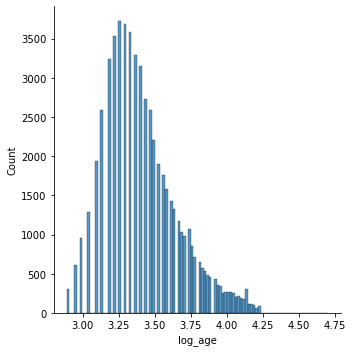

In [5]:
# Normalize age
df_age = df['age']

df['log_age'] = df.age.apply(lambda x: np.log(x))

sns.displot(df.log_age)
plt.show()

df.log_age = df.log_age.fillna(df.log_age.mean())

In [6]:
## What are the columns?
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status', 'log_age'],
      dtype='object')

In [7]:
## What are the dtypes of each column?
df.dtypes

age              int64
body_type       object
diet            object
drinks          object
drugs           object
education       object
essay0          object
essay1          object
essay2          object
essay3          object
essay4          object
essay5          object
essay6          object
essay7          object
essay8          object
essay9          object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
offspring       object
orientation     object
pets            object
religion        object
sex             object
sign            object
smokes          object
speaks          object
status          object
log_age        float64
dtype: object

In [8]:
## How many rows, columns in the data?
df.shape

(59946, 32)

In [9]:
## Summary statistics of our quantitative variables
df.describe()

age        height          income       log_age
count  59946.000000  59943.000000    59946.000000  59946.000000
mean      32.340290     68.295281    20033.222534      3.438675
std        9.452779      3.994803    97346.192104      0.267559
min       18.000000      1.000000       -1.000000      2.890372
25%       26.000000     66.000000       -1.000000      3.258097
50%       30.000000     68.000000       -1.000000      3.401197
75%       37.000000     71.000000       -1.000000      3.610918
max      110.000000     95.000000  1000000.000000      4.700480

In [10]:
##  What unique values are within the columns of our dataset?
for i in df.columns:
    print(df[i].value_counts())

26     3724
27     3685
28     3583
25     3531
29     3295
24     3242
30     3149
31     2735
23     2592
32     2587
33     2206
22     1934
34     1902
35     1755
36     1583
37     1427
38     1330
21     1282
39     1172
42     1072
40     1030
41      980
20      953
43      858
44      708
45      643
19      611
46      578
47      529
48      481
49      459
50      437
51      350
52      344
18      309
56      271
54      267
55      265
57      256
53      252
59      221
58      197
60      195
61      176
62      167
63      138
64      113
65      109
66      105
67       66
68       59
69       31
110       1
109       1
Name: age, dtype: int64
average           14652
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: body_type, dtype: int64
mostly any

In [11]:
## Create aa pandas profiling report, for fun and efficient EDA.
pp.ProfileReport(df)

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


In [12]:
## Let's clean up some of the variables we're working with. Religion and Sign have a lot of noise.
df['cleaned_sign'] = df.sign.str.split().str.get(0)
print("num of signs:",df.cleaned_sign.nunique())
print("signs:",df.cleaned_sign.unique())

df['cleaned_religion'] = df.religion.str.split().str.get(0)
print("num of religions:",df.cleaned_religion.nunique())
print("religions:",df.cleaned_religion.unique())


num of signs: 12
signs: ['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'aries' 'libra' 'scorpio' 'capricorn']
num of religions: 9
religions: ['agnosticism' nan 'atheism' 'christianity' 'other' 'catholicism'
 'buddhism' 'judaism' 'hinduism' 'islam']


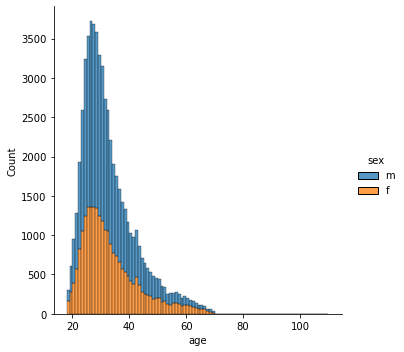

In [13]:
## Let's graph all of our variables
sns.displot(data=df, x="age", kind="hist", binwidth = 1, hue='sex', multiple='stack')

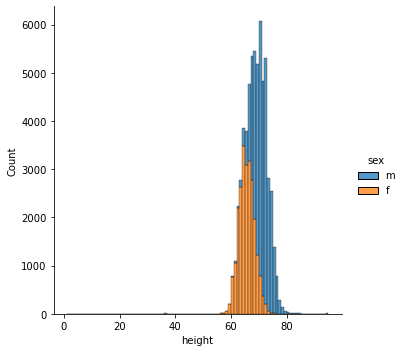

In [14]:
sns.displot(data=df, x="height", kind="hist", binwidth = 1, hue='sex', multiple='stack')

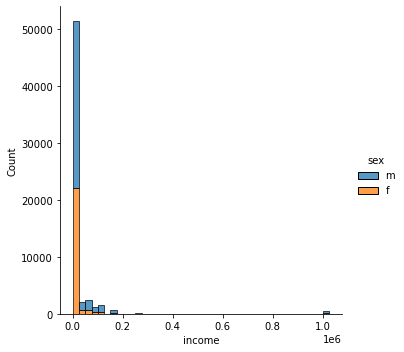

In [15]:
sns.displot(data=df, x="income", kind="hist", binwidth = 25000, hue='sex', multiple='stack')

<AxesSubplot:xlabel='count', ylabel='sex'>

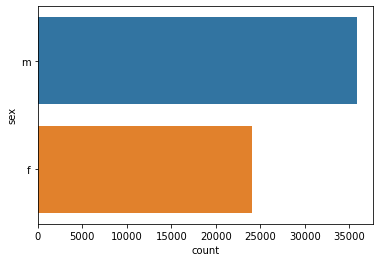

In [16]:
sns.countplot(y=df.sex)

<AxesSubplot:xlabel='count', ylabel='body_type'>

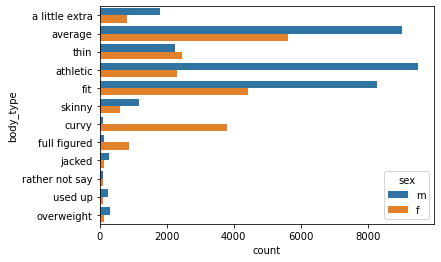

In [17]:
sns.countplot(y=df.body_type, hue=df.sex)

<AxesSubplot:xlabel='count', ylabel='diet'>

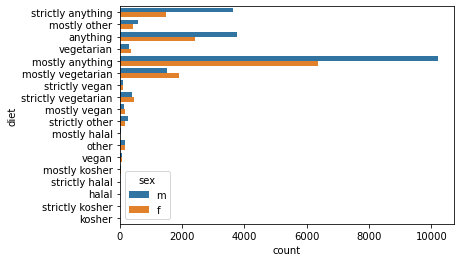

In [18]:
sns.countplot(y=df.diet, hue=df.sex)

<AxesSubplot:xlabel='count', ylabel='drinks'>

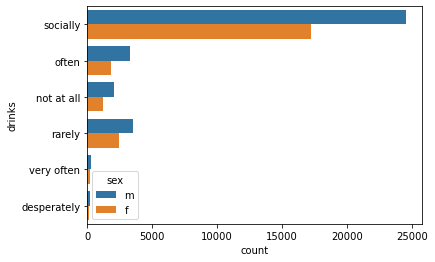

In [19]:
sns.countplot(y=df.drinks, hue=df.sex)

<AxesSubplot:xlabel='count', ylabel='drugs'>

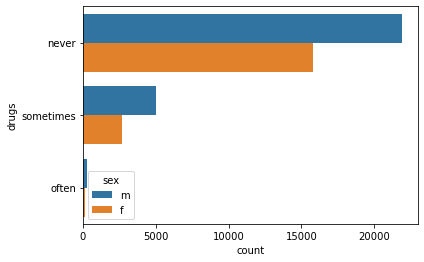

In [20]:
sns.countplot(y=df.drugs, hue=df.sex)

<AxesSubplot:xlabel='count', ylabel='education'>

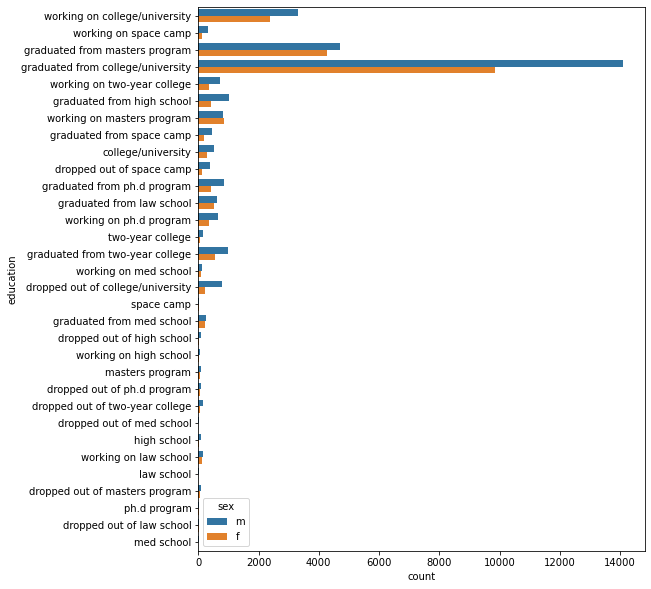

In [21]:
plt.figure(figsize=(8,10))
sns.countplot(y=df.education,  hue=df.sex)

<AxesSubplot:xlabel='count', ylabel='job'>

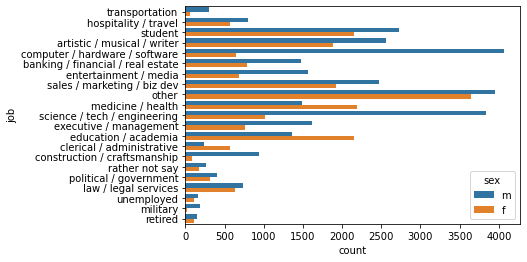

In [22]:
sns.countplot(y=df.job, hue=df.sex)

<AxesSubplot:xlabel='count', ylabel='offspring'>

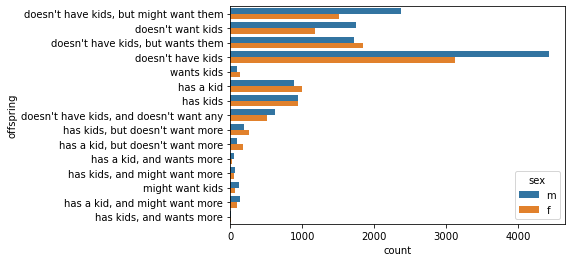

In [23]:
sns.countplot(y=df.offspring, hue=df.sex)

<AxesSubplot:xlabel='count', ylabel='orientation'>

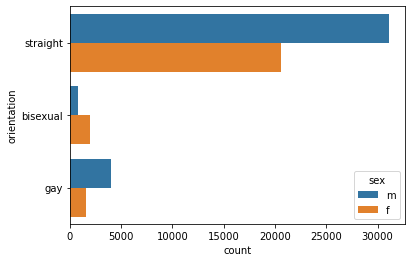

In [24]:
sns.countplot(y=df.orientation, hue=df.sex)

<AxesSubplot:xlabel='count', ylabel='pets'>

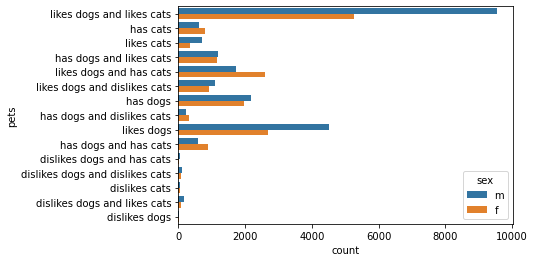

In [25]:
sns.countplot(y=df.pets,hue=df.sex)

<AxesSubplot:xlabel='count', ylabel='cleaned_religion'>

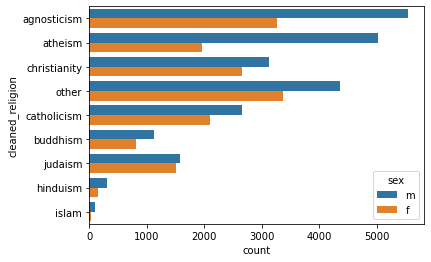

In [26]:
sns.countplot(y=df.cleaned_religion, hue=df.sex)

<AxesSubplot:xlabel='count', ylabel='cleaned_sign'>

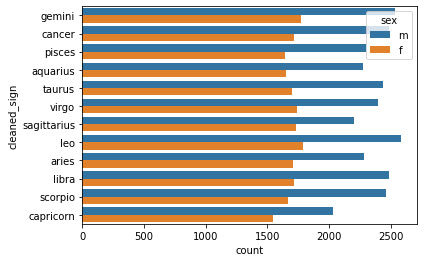

In [27]:
sns.countplot(y=df.cleaned_sign, hue=df.sex)

<AxesSubplot:xlabel='count', ylabel='smokes'>

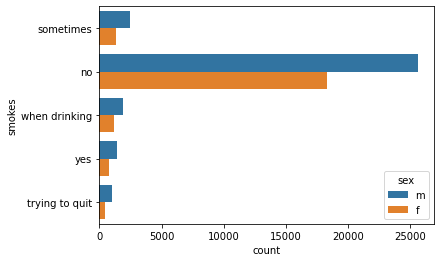

In [28]:
sns.countplot(y=df.smokes, hue=df.sex)

<AxesSubplot:xlabel='count', ylabel='status'>

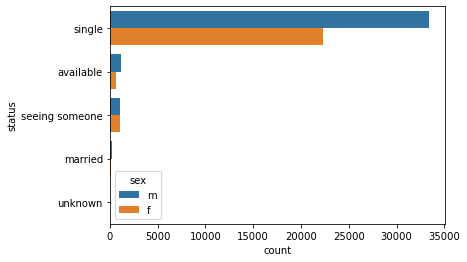

In [29]:
sns.countplot(y=df.status, hue=df.sex)

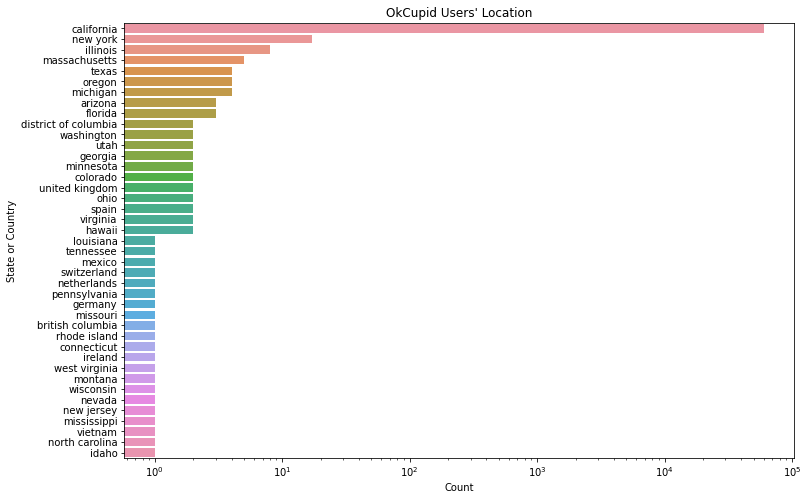

In [30]:
df['location_cleaned'] = df['location'].dropna().apply(lambda x: x.split(", ")[1])
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.countplot(y='location_cleaned', data=df, order=df['location_cleaned'].value_counts().index)
plt.xlabel("Count")
plt.xscale('log')
plt.ylabel("State or Country")
plt.title("OkCupid Users' Location")
plt.show()


In [ ]:
ethnicity_map = {'asian': 'asian', 'white':'white', 'black':'black', 'hispanic / latin': 'latin', 'native american': 'native american', 'other':'other', 'pacific islander':'pacific islander', 'middle eastern': 'middle eastern', 'indian': 'indian', 'unknown':'unknown'}
df['ethnicity'] = df.ethnicity.fillna('unknown')
df['ethnicity_clean'] = df.ethnicity.map(ethnicity_map).fillna('multiethnic')

plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.countplot(y='ethnicity_clean', data=df, order=df['ethnicity_clean'].value_counts().index)
plt.xlabel("Count")
plt.xscale('log')
plt.ylabel("Ethnicity")
plt.title("OkCupid Users' Ethnicity(s)")
plt.show()


white               32831
multiethnic          6859
asian                6134
unknown              5680
latin                2823
black                2008
other                1706
indian               1077
pacific islander      432
middle eastern        329
native american        67
Name: ethnicity_clean, dtype: int64

In [32]:
# Empty values in each column
df.isna().sum()

age                     0
body_type            5296
diet                24395
drinks               2985
drugs               14080
education            6628
essay0               5488
essay1               7572
essay2               9638
essay3              11476
essay4              10537
essay5              10850
essay6              13771
essay7              12451
essay8              19225
essay9              12603
ethnicity               0
height                  3
income                  0
job                  8198
last_online             0
location                0
offspring           35561
orientation             0
pets                19921
religion            20226
sex                     0
sign                11056
smokes               5512
speaks                 50
status                  0
log_age                 0
cleaned_sign        11056
cleaned_religion    20226
location_cleaned        0
ethnicity_clean         0
dtype: int64

In [33]:
## Let's numericize the qualitative data where possible
# For education: 0 - less than college, 1 - college, 2 - more than college
edu_map = {'dropped out of high school': 0,
             'working on high school' : 0, 
             'high school': 0, 
             'graduated from high school': 0, 
             'dropped out of two-year college': 0,
             'dropped out of space camp': 0,
             'working on two-year college': 0,
             'working on space camp': 0,
             'space camp': 0,
             'two-year college': 0,
             'graduated from space camp': 0,
             'graduated from two-year college': 0,
             'dropped out of college/university': 0,
             'working on college/university': 1,
             'college/university': 1,
             'graduated from college/university': 1,
             'dropped out of masters program': 1,
             'working on masters program': 2,
             'masters program': 2,
             'graduated from masters program': 2,
             'dropped out of law school': 1,
             'working on law school': 2,
             'law school': 2,
             'graduated from law school': 2,
             'dropped out of med school': 1,
             'working on med school': 2,
             'med school': 2,
             'graduated from med school': 2,
             'dropped out of ph.d program': 2,
             'working on ph.d program': 2,
             'ph.d program': 2,
             'graduated from ph.d program': 2}
df['edu_int'] = df.education.map(edu_map).replace(np.nan, 0)
# Change from a float
df.edu_int = df.edu_int.astype(int)
df.edu_int.head()

0    1
1    0
2    2
3    1
4    1
Name: edu_int, dtype: int32

In [34]:
# Clean up NaN values and numericize our cleaned_religion column
df.cleaned_religion.replace('nan', np.NaN, inplace = True)
df.cleaned_religion = df.cleaned_religion.apply(lambda x: 'not religious' if pd.isnull(x) else x)
df['religion_int'] = df.cleaned_religion.map({'not religious': 0, 'agnosticism': 0, 'atheism': 0, 'other': 0, 'christianity': 1, 'catholicism': 1, 'judaism': 1, 'buddhism': 1, 'hinduism': 1, 'islam': 1})
df.religion_int.head()


0    0
1    0
2    0
3    0
4    0
Name: religion_int, dtype: int64

In [35]:
## Cleaned up NaN, numericize Smoker status
df['smoker_int'] = df.smokes.map({'no':0,'sometimes':1,'when drinking':1,'yes':2,'trying to quit': 2}).replace(np.nan, 0)
df['smoker_int'] =df.smoker_int.astype(int)
df.smoker_int.head()

0    1
1    0
2    0
3    0
4    0
Name: smoker_int, dtype: int32

In [36]:
## Drinking
df['drinks_int'] = df.drinks.map({'not at all': 0, 'rarely': 1, 'socially': 2, 'often': 3, 'very often': 4, 'desperately': 5}).replace(np.nan, 0)
df['drinks_int'] = df.drinks_int.astype(int)
df.drinks_int.head()

0    2
1    3
2    2
3    2
4    2
Name: drinks_int, dtype: int32

In [37]:
## Drugs
df['drugs_int'] = df.drugs.map({'never':0,'sometimes':1,'often':2}).replace(np.nan, 0)
df.drugs_int = df.drugs_int.astype(int)
df.drugs_int.head()

0    0
1    1
2    0
3    0
4    0
Name: drugs_int, dtype: int32

In [38]:
## Diet - One Hot Encoding
## Split out the meaninful word, ditch strictly/mostly qualifiers
df['diet_clean'] = df.diet.apply(lambda x: str(x).split(' ')[-1])
## Replace string nan values with np.nan values for easier changes
df.diet_clean.replace('nan', np.NaN, inplace = True)
## if the value is nan, make it 'anything'
df.diet_clean = df.diet_clean.apply(lambda x: 'anything' if pd.isnull(x) else x)
df = pd.get_dummies(data=df, columns=['diet_clean'])
df.head()


age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:  i would love to think that i was so...   
1  i am a chef: this is what that means. 1. i am ...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                                              essay1  \
0  currently working as an international agent fo...   
1  dedicating everyday to being an unbelievable b...   
2  i make nerdy software for musicians, artists, ...   
3          reading things written by old dead people   
4                         work work work work + play   

                                              essay2  \
0  making people laugh. ranting about a good salt...   
1  being silly. having ridiculous amonts of fun w...   
2  improvising in different contexts. alternating...   
3  playing synthesizers and organizing books acco...   
4  creating imagery to look at: http://bagsbrown....   

                                              essay3  ... religion_int  \
0  the way i look. i am a six foot half asian, ha...  ...            0   
1                                                NaN  ...            0   
2  my large jaw and large glasses are the physica...  ...            0   
3                  socially awkward but i do my best  ...            0   
4            i smile a lot and my inquisitive nature  ...            0   

  smoker_int drinks_int drugs_int diet_clean_anything diet_clean_halal  \
0          1          2         0                   1                0   
1          0          3         1                   0                0   
2          0          2         0                   1                0   
3          0          2         0                   0                0   
4          0          2         0                   1                0   

  diet_clean_kosher  diet_clean_other  diet_clean_vegan diet_clean_vegetarian  
0                 0                 0                 0                     0  
1                 0                 1                 0                     0  
2                 0                 0                 0                     0  
3                 0                 0                 0                     1  
4                 0                 0                 0                     0  

[5 rows x 47 columns]

In [39]:
## OHE for Orientation column
df = pd.get_dummies(data=df, columns=['orientation'])
df.head()

age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:  i would love to think that i was so...   
1  i am a chef: this is what that means. 1. i am ...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                                              essay1  \
0  currently working as an international agent fo...   
1  dedicating everyday to being an unbelievable b...   
2  i make nerdy software for musicians, artists, ...   
3          reading things written by old dead people   
4                         work work work work + play   

                                              essay2  \
0  making people laugh. ranting about a good salt...   
1  being silly. having ridiculous amonts of fun w...   
2  improvising in different contexts. alternating...   
3  playing synthesizers and organizing books acco...   
4  creating imagery to look at: http://bagsbrown....   

                                              essay3  ... drugs_int  \
0  the way i look. i am a six foot half asian, ha...  ...         0   
1                                                NaN  ...         1   
2  my large jaw and large glasses are the physica...  ...         0   
3                  socially awkward but i do my best  ...         0   
4            i smile a lot and my inquisitive nature  ...         0   

  diet_clean_anything diet_clean_halal diet_clean_kosher diet_clean_other  \
0                   1                0                 0                0   
1                   0                0                 0                1   
2                   1                0                 0                0   
3                   0                0                 0                0   
4                   1                0                 0                0   

  diet_clean_vegan diet_clean_vegetarian  orientation_bisexual  \
0                0                     0                     0   
1                0                     0                     0   
2                0                     0                     0   
3                0                     1                     0   
4                0                     0                     0   

   orientation_gay orientation_straight  
0                0                    1  
1                0                    1  
2                0                    1  
3                0                    1  
4                0                    1  

[5 rows x 49 columns]

In [40]:
## OHE for Ethnicity_Clean column
df = pd.get_dummies(data=df, columns = ['ethnicity_clean'])
df.head()

age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:  i would love to think that i was so...   
1  i am a chef: this is what that means. 1. i am ...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                                              essay1  \
0  currently working as an international agent fo...   
1  dedicating everyday to being an unbelievable b...   
2  i make nerdy software for musicians, artists, ...   
3          reading things written by old dead people   
4                         work work work work + play   

                                              essay2  \
0  making people laugh. ranting about a good salt...   
1  being silly. having ridiculous amonts of fun w...   
2  improvising in different contexts. alternating...   
3  playing synthesizers and organizing books acco...   
4  creating imagery to look at: http://bagsbrown....   

                                              essay3  ...  \
0  the way i look. i am a six foot half asian, ha...  ...   
1                                                NaN  ...   
2  my large jaw and large glasses are the physica...  ...   
3                  socially awkward but i do my best  ...   
4            i smile a lot and my inquisitive nature  ...   

  ethnicity_clean_black ethnicity_clean_indian ethnicity_clean_latin  \
0                     0                      0                     0   
1                     0                      0                     0   
2                     0                      0                     0   
3                     0                      0                     0   
4                     0                      0                     0   

  ethnicity_clean_middle eastern ethnicity_clean_multiethnic  \
0                              0                           1   
1                              0                           0   
2                              0                           0   
3                              0                           0   
4                              0                           1   

  ethnicity_clean_native american ethnicity_clean_other  \
0                               0                     0   
1                               0                     0   
2                               0                     0   
3                               0                     0   
4                               0                     0   

   ethnicity_clean_pacific islander  ethnicity_clean_unknown  \
0                                 0                        0   
1                                 0                        0   
2                                 0                        1   
3                                 0                        0   
4                                 0                        0   

  ethnicity_clean_white  
0                     0  
1                     1  
2                     0  
3                     1  
4                     0  

[5 rows x 59 columns]

In [41]:
## OHE for Location_cleaned - lots of columns now
df = pd.get_dummies(data=df,columns=['location_cleaned'])
df.head()

age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:  i would love to think that i was so...   
1  i am a chef: this is what that means. 1. i am ...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                                              essay1  \
0  currently working as an international agent fo...   
1  dedicating everyday to being an unbelievable b...   
2  i make nerdy software for musicians, artists, ...   
3          reading things written by old dead people   
4                         work work work work + play   

                                              essay2  \
0  making people laugh. ranting about a good salt...   
1  being silly. having ridiculous amonts of fun w...   
2  improvising in different contexts. alternating...   
3  playing synthesizers and organizing books acco...   
4  creating imagery to look at: http://bagsbrown....   

                                              essay3  ...  \
0  the way i look. i am a six foot half asian, ha...  ...   
1                                                NaN  ...   
2  my large jaw and large glasses are the physica...  ...   
3                  socially awkward but i do my best  ...   
4            i smile a lot and my inquisitive nature  ...   

  location_cleaned_switzerland location_cleaned_tennessee  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

  location_cleaned_texas location_cleaned_united kingdom  \
0                      0                               0   
1                      0                               0   
2                      0                               0   
3                      0                               0   
4                      0                               0   

  location_cleaned_utah location_cleaned_vietnam location_cleaned_virginia  \
0                     0                        0                         0   
1                     0                        0                         0   
2                     0                        0                         0   
3                     0                        0                         0   
4                     0                        0                         0   

   location_cleaned_washington  location_cleaned_west virginia  \
0                            0                               0   
1                            0                               0   
2                            0                               0   
3                            0                               0   
4                            0                               0   

  location_cleaned_wisconsin  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  

[5 rows x 99 columns]

In [42]:
df.isna().sum()

age                                   0
body_type                          5296
diet                              24395
drinks                             2985
drugs                             14080
                                  ...  
location_cleaned_vietnam              0
location_cleaned_virginia             0
location_cleaned_washington           0
location_cleaned_west virginia        0
location_cleaned_wisconsin            0
Length: 99, dtype: int64

In [43]:
# Drop nan values. Create label subset
#df.cleaned_sign.unique()
df = df.dropna(subset = ['cleaned_sign']).reset_index()
df['sign_int'] = df.cleaned_sign.map({'leo': 0, 'gemini': 1, 'libra': 2, 'cancer':3, 'virgo': 4, 'taurus': 5, 'scorpio': 6, 'aries': 7, 'pisces': 8, 'sagittarius': 9, 'aquarius': 10, 'capricorn': 11})
labels = df['sign_int']
print(labels)
labels_series = labels.squeeze()
labels_final = np.ravel(labels_series)
print(labels_final)

0         1
1         3
2         8
3         8
4        10
         ..
48885     3
48886     0
48887     9
48888     0
48889     1
Name: sign_int, Length: 48890, dtype: int64
[1 3 8 ... 9 0 1]


In [44]:
df.columns

Index(['index', 'age', 'body_type', 'diet', 'drinks', 'drugs', 'education',
       'essay0', 'essay1', 'essay2',
       ...
       'location_cleaned_tennessee', 'location_cleaned_texas',
       'location_cleaned_united kingdom', 'location_cleaned_utah',
       'location_cleaned_vietnam', 'location_cleaned_virginia',
       'location_cleaned_washington', 'location_cleaned_west virginia',
       'location_cleaned_wisconsin', 'sign_int'],
      dtype='object', length=101)

In [45]:
# Data subset
data = df[['log_age', 'edu_int', 'religion_int', 'smoker_int', 'drinks_int', 
             'drugs_int', 'diet_clean_anything', 'diet_clean_halal', 'diet_clean_kosher', 'diet_clean_other',
             'diet_clean_vegan', 'diet_clean_vegetarian', 'orientation_bisexual',
             'orientation_gay', 'orientation_straight', 'ethnicity_clean_asian', 'ethnicity_clean_black',
       'ethnicity_clean_indian', 'ethnicity_clean_latin',
       'ethnicity_clean_middle eastern', 'ethnicity_clean_multiethnic',
       'ethnicity_clean_native american', 'ethnicity_clean_other',
       'ethnicity_clean_pacific islander', 'ethnicity_clean_unknown',
       'ethnicity_clean_white', 'location_cleaned_arizona',
       'location_cleaned_british columbia', 'location_cleaned_california',
       'location_cleaned_colorado', 'location_cleaned_connecticut',
       'location_cleaned_district of columbia', 'location_cleaned_florida',
       'location_cleaned_georgia', 'location_cleaned_germany',
       'location_cleaned_hawaii', 'location_cleaned_idaho',
       'location_cleaned_illinois', 'location_cleaned_louisiana',
       'location_cleaned_massachusetts', 'location_cleaned_mexico',
       'location_cleaned_michigan', 'location_cleaned_minnesota',
       'location_cleaned_mississippi', 'location_cleaned_missouri',
       'location_cleaned_montana', 'location_cleaned_netherlands',
       'location_cleaned_nevada', 'location_cleaned_new jersey',
       'location_cleaned_new york', 'location_cleaned_ohio',
       'location_cleaned_oregon', 'location_cleaned_pennsylvania',
       'location_cleaned_rhode island', 'location_cleaned_spain',
       'location_cleaned_switzerland', 'location_cleaned_tennessee',
       'location_cleaned_texas', 'location_cleaned_united kingdom',
       'location_cleaned_utah', 'location_cleaned_vietnam',
       'location_cleaned_washington', 'location_cleaned_west virginia']]
print(data.head())
data.isnull().sum()

    log_age  edu_int  religion_int  smoker_int  drinks_int  drugs_int  \
0  3.091042        1             0           1           2          0   
1  3.555348        0             0           0           3          1   
2  3.637586        2             0           0           2          0   
3  3.135494        1             0           0           2          0   
4  3.367296        1             0           0           2          0   

   diet_clean_anything  diet_clean_halal  diet_clean_kosher  diet_clean_other  \
0                    1                 0                  0                 0   
1                    0                 0                  0                 1   
2                    1                 0                  0                 0   
3                    0                 0                  0                 0   
4                    1                 0                  0                 0   

   ...  location_cleaned_rhode island  location_cleaned_spain  \
0  ...   

log_age                            0
edu_int                            0
religion_int                       0
smoker_int                         0
drinks_int                         0
                                  ..
location_cleaned_united kingdom    0
location_cleaned_utah              0
location_cleaned_vietnam           0
location_cleaned_washington        0
location_cleaned_west virginia     0
Length: 63, dtype: int64

In [46]:
print(len(data), len(labels))

48890 48890


In [47]:
## Scale & Standardize the data
scaled_data = scale(data)
print(scaled_data[0])

[-1.30749265 -0.02540929 -0.64522976  1.28242989  0.20851995 -0.40381621
  0.39356192 -0.03620466 -0.04342031 -0.18388021 -0.11146718 -0.30664265
 -0.22556166 -0.33650607  0.42030303 -0.32896004 -0.19562406 -0.13181777
 -0.23136024 -0.07534837  2.66554049 -0.03231482 -0.17283009 -0.08791796
 -0.29626668 -1.10592998 -0.00783365 -0.00452267  0.03840398 -0.00452267
 -0.00452267 -0.00452267 -0.00783365 -0.00639608 -0.00452267 -0.00452267
 -0.00452267 -0.01107879 -0.00452267 -0.00904561 -0.00452267 -0.00783365
 -0.00452267 -0.00452267 -0.00452267 -0.00452267 -0.00452267 -0.00452267
 -0.00452267 -0.01692451 -0.00452267 -0.00783365 -0.00452267 -0.00452267
 -0.00639608 -0.00452267 -0.00452267 -0.00783365 -0.00639608 -0.00639608
 -0.00452267 -0.00639608 -0.00452267]


In [48]:
## Break out training and test sets
train_data, test_data, train_labels, test_labels = train_test_split(scaled_data, labels_final, test_size=0.2, random_state = 1)

In [49]:
# KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=12)
knn_classifier.fit(train_data, train_labels)

KNeighborsClassifier(n_neighbors=12)

In [50]:
print(knn_classifier.score(test_data,test_labels))
knn_guesses = knn_classifier.predict(test_data)

0.08273675598281857


In [51]:
print('KNN Accuracy Score: ' + str(accuracy_score(test_labels, knn_guesses)))
print('KNN Recall Score: ' + str(recall_score(test_labels, knn_guesses, average='weighted')))
print('KNN Precision Score: ' + str(precision_score(test_labels, knn_guesses, average='weighted')))
print('KNN F1 Score: ' + str(f1_score(test_labels, knn_guesses, average='weighted')))

KNN Accuracy Score: 0.08273675598281857
KNN Recall Score: 0.08273675598281857
KNN Precision Score: 0.08299311169021964
KNN F1 Score: 0.07878050775800413


In [52]:
print(classification_report(test_labels, knn_guesses))

              precision    recall  f1-score   support

           0       0.08      0.17      0.11       860
           1       0.09      0.14      0.11       874
           2       0.08      0.12      0.09       754
           3       0.09      0.10      0.09       846
           4       0.09      0.08      0.08       858
           5       0.09      0.08      0.08       859
           6       0.08      0.06      0.07       841
           7       0.08      0.05      0.06       804
           8       0.07      0.04      0.05       789
           9       0.09      0.06      0.07       789
          10       0.07      0.05      0.06       782
          11       0.09      0.04      0.06       722

    accuracy                           0.08      9778
   macro avg       0.08      0.08      0.08      9778
weighted avg       0.08      0.08      0.08      9778



12


Text(0.5, 1.0, 'Accuracy Score: 0.08273675598281857')

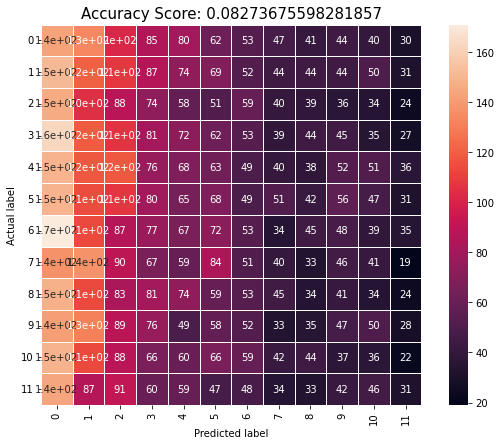

In [53]:
knn_cm = confusion_matrix(test_labels, knn_guesses)
knn_labels = knn_classifier.classes_
print(len(knn_labels))
plt.figure(figsize=(10,7))
sns.heatmap(data=knn_cm,linewidths=.5, annot=True,square = True)
plt.yticks(np.arange(len(knn_labels))+.5, knn_labels, rotation=0)
plt.xticks(np.arange(len(knn_labels))+.5, knn_labels, rotation=90)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(knn_classifier.score(test_data, test_labels))
plt.title(all_sample_title, size = 15)

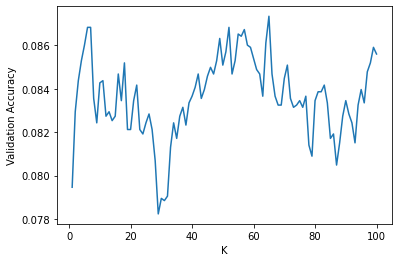

In [54]:
accuracies = []
for k in range(1,101):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(train_data, train_labels)
    accuracies.append(knn_classifier.score(test_data, test_labels))

k_list=range(1,101)
plt.plot(k_list, accuracies)
plt.xlabel('K')
plt.ylabel('Validation Accuracy')
plt.show()

In [55]:
log_reg_model = LogisticRegression(multi_class="multinomial",solver="lbfgs",        max_iter=5000).fit(train_data, train_labels)

log_guesses = log_reg_model.predict(test_data)

In [56]:
print('Logistics Regression Accuracy Score: ' + str(accuracy_score(test_labels, log_guesses)))
print('Logistic Regression Recall Score: ' + str(recall_score(test_labels, log_guesses, average='weighted')))
print('Logistic Regression Precision Score: ' + str(precision_score(test_labels, log_guesses, average='weighted')))
print('Logistics Regression F1 Score: ' + str(f1_score(test_labels, log_guesses, average='weighted')))

Logistics Regression Accuracy Score: 0.08754346492125178
Logistic Regression Recall Score: 0.08754346492125178
Logistic Regression Precision Score: 0.08806310580951225
Logistics Regression F1 Score: 0.06832487944267099


In [57]:

print(classification_report(test_labels, log_guesses))

              precision    recall  f1-score   support

           0       0.09      0.29      0.14       860
           1       0.09      0.19      0.12       874
           2       0.07      0.14      0.10       754
           3       0.08      0.10      0.09       846
           4       0.08      0.02      0.04       858
           5       0.08      0.03      0.05       859
           6       0.09      0.14      0.11       841
           7       0.05      0.01      0.01       804
           8       0.08      0.07      0.07       789
           9       0.12      0.02      0.03       789
          10       0.07      0.03      0.04       782
          11       0.14      0.00      0.00       722

    accuracy                           0.09      9778
   macro avg       0.09      0.09      0.07      9778
weighted avg       0.09      0.09      0.07      9778



12


Text(0.5, 1.0, 'Accuracy Score: 0.08754346492125178')

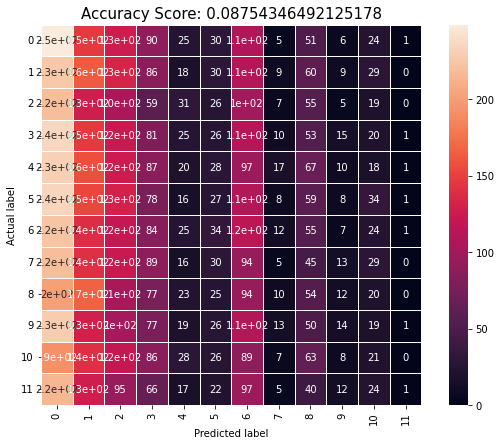

In [58]:
log_cm = confusion_matrix(test_labels, log_guesses)
log_labels = log_reg_model.classes_
print(len(log_labels))
plt.figure(figsize=(10,7))
sns.heatmap(data=log_cm,linewidths=.5, annot=True,square = True)
plt.yticks(np.arange(len(log_labels))+.5, log_labels, rotation=0)
plt.xticks(np.arange(len(log_labels))+.5, log_labels, rotation=90)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(log_reg_model.score(test_data, test_labels))
plt.title(all_sample_title, size = 15)

In [59]:

cart_model = DecisionTreeClassifier().fit(train_data, train_labels) 

cart_guesses = cart_model.predict(test_data)

In [60]:
print('CART Model Accuracy Score: ' + str(accuracy_score(test_labels, knn_guesses)))
print('CART Model Recall Score: ' + str(recall_score(test_labels, knn_guesses, average='weighted')))
print('CART Model Precision Score: ' + str(precision_score(test_labels, knn_guesses, average='weighted')))
print('CART Model F1 Score: ' + str(f1_score(test_labels, knn_guesses, average='weighted')))

CART Model Accuracy Score: 0.08273675598281857
CART Model Recall Score: 0.08273675598281857
CART Model Precision Score: 0.08299311169021964
CART Model F1 Score: 0.07878050775800413


12


Text(0.5, 1.0, 'Accuracy Score: 0.07874821026794845')

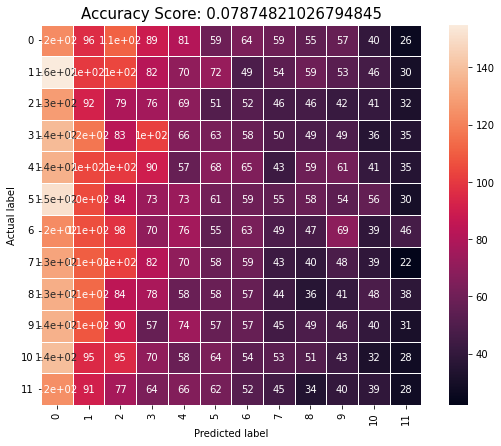

In [61]:
cart_cm = confusion_matrix(test_labels, cart_guesses)
cart_labels = cart_model.classes_
print(len(cart_labels))
plt.figure(figsize=(10,7))
sns.heatmap(data=cart_cm,linewidths=.5, annot=True,square = True)
plt.yticks(np.arange(len(cart_labels))+.5, cart_labels, rotation=0)
plt.xticks(np.arange(len(cart_labels))+.5, cart_labels, rotation=90)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(cart_model.score(test_data, test_labels))
plt.title(all_sample_title, size = 15)

In [62]:
forest = RandomForestClassifier(random_state=1)
forest.fit(train_data, train_labels)
forest_guesses = forest.predict(test_data)

In [63]:
print('Forest Accuracy Score: ' + str(accuracy_score(test_labels, forest_guesses)))
print('Forest Recall Score: ' + str(recall_score(test_labels, forest_guesses, average='weighted')))
print('Forest Precision Score: ' + str(precision_score(test_labels, forest_guesses, average='weighted')))
print('Forest F1 Score: ' + str(f1_score(test_labels, forest_guesses, average='weighted')))

Forest Accuracy Score: 0.0807936183268562
Forest Recall Score: 0.0807936183268562
Forest Precision Score: 0.08056285208461299
Forest F1 Score: 0.08037534596913513


12


Text(0.5, 1.0, 'Accuracy Score: 0.0807936183268562')

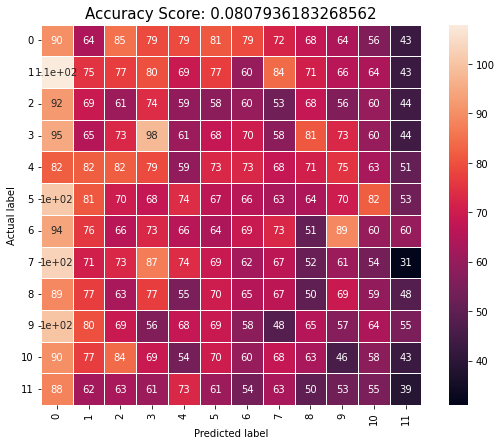

In [64]:
forest_cm = confusion_matrix(test_labels, forest_guesses)
forest_labels = forest.classes_
print(len(forest_labels))
plt.figure(figsize=(10,7))
sns.heatmap(data=forest_cm,linewidths=.5, annot=True,square = True)
plt.yticks(np.arange(len(forest_labels))+.5, forest_labels, rotation=0)
plt.xticks(np.arange(len(forest_labels))+.5, forest_labels, rotation=90)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(forest.score(test_data, test_labels))
plt.title(all_sample_title, size = 15)

In [65]:
df[['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']] = df[['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']].fillna('')
df.isnull().sum()

index                                 0
age                                   0
body_type                          3938
diet                              18770
drinks                             1526
                                  ...  
location_cleaned_virginia             0
location_cleaned_washington           0
location_cleaned_west virginia        0
location_cleaned_wisconsin            0
sign_int                              0
Length: 101, dtype: int64

In [66]:
nb_labels = df[['sign_int']]
nb_labels_series = nb_labels.squeeze()
nb_labels_final = labels_series.ravel()
print(nb_labels_final)
print(len(nb_labels_final))

[1 3 8 ... 9 0 1]
48890


In [67]:
df['all_essays'] = df.loc[:, ('essay0')] + df.loc[:, ('essay1')] + df.loc[:, ('essay2')] + df.loc[:, ('essay3')] + df.loc[:, ('essay4')] + df.loc[:, ('essay5')] + df.loc[:, ('essay6')] + df.loc[:, ('essay7')] + df.loc[:, ('essay8')] + df.loc[:, ('essay9')]
#print(df.all_essays[0])
all_essays = df[['all_essays']]
#print(type(all_essays))
#for i in range()
all_essays_series = all_essays.squeeze()
#print(all_essays_series)
all_essays_final = all_essays_series.ravel()
#print(all_essays_final)
for i in range(len(all_essays_final)):
    essay = re.sub(r'<br\s.?>', ' ', all_essays_final[i])
    all_essays_final[i] = essay
for i in range(len(all_essays_final)):
    essay = re.sub(r'\.', ' ', all_essays_final[i])
    all_essays_final[i] = essay
for i in range(len(all_essays_final)):
    essay = re.sub(r':', ' ', all_essays_final[i])
    all_essays_final[i] = essay
for i in range(len(all_essays_final)):
    essay = re.sub(r'\n', ' ', all_essays_final[i])
    all_essays_final[i] = essay
for i in range(len(all_essays_final)):
    essay = re.sub(r',', ' ', all_essays_final[i])
    all_essays_final[i] = essay
for i in range(len(all_essays_final)):
    essay = re.sub(r'\(', '', all_essays_final[i])
    all_essays_final[i] = essay
for i in range(len(all_essays_final)):
    essay = re.sub(r'\)', '', all_essays_final[i])
    all_essays_final[i] = essay
for i in range(len(all_essays_final)):
    essay = re.sub(r'\'', '', all_essays_final[i])
    all_essays_final[i] = essay
for i in range(len(all_essays_final)):
    essay = all_essays_final[i].lower()
    all_essays_final[i] = essay
for i in range(len(all_essays_final)):
    essay = re.sub(r'!', '', all_essays_final[i])
    all_essays_final[i] = essay
for i in range(len(all_essays_final)):
    essay = re.sub(r'\?', '', all_essays_final[i])
    all_essays_final[i] = essay
for i in range(len(all_essays_final)):
    essay = re.sub(r'\s+', ' ', all_essays_final[i])
    all_essays_final[i] = essay
print(all_essays_final[0])

about me i would love to think that i was some some kind of intellectual either the dumbest smart guy or the smartest dumb guy cant say i can tell the difference i love to talk about ideas and concepts i forge odd metaphors instead of reciting cliches like the simularities between a friend of mines house and an underwater salt mine my favorite word is salt by the way weird choice i know to me most things in life are better as metaphors i seek to make myself a little better everyday in some productively lazy way got tired of tying my shoes considered hiring a five year old but would probably have to tie both of our shoes decided to only wear leather shoes dress shoes about you you love to have really serious really deep conversations about really silly stuff you have to be willing to snap me out of a light hearted rant with a kiss you dont have to be funny but you have to be able to make me laugh you should be able to bend spoons with your mind and telepathically make me smile while i a

In [68]:
print(len(all_essays_final))
print(df.essay9[0])
print(len(nb_labels_final))
train_data, test_data, train_labels, test_labels = train_test_split(all_essays_final, nb_labels_final, test_size=0.2)

48890
you want to be swept off your feet! you are tired of the norm. you want to catch a coffee or a bite. or if you want to talk philosophy.
48890


In [69]:
counter = CountVectorizer()
counter.fit(train_data)
train_counts = counter.transform(train_data)
test_counts = counter.transform(test_data)

In [70]:
nb_classifier = MultinomialNB()
nb_classifier.fit(train_counts, train_labels)
nb_guesses = nb_classifier.predict(test_counts)

In [71]:
print('Naive Bayes Accuracy Score: ' + str(accuracy_score(test_labels, nb_guesses)))
print('Naive Bayes Recall Score: ' + str(recall_score(test_labels, nb_guesses, average='weighted')))
print('Naive Bayes Precision Score: ' + str(precision_score(test_labels, nb_guesses, average='weighted')))
print('Naive Bayes F1 Score: ' + str(f1_score(test_labels, nb_guesses, average='weighted')))

Naive Bayes Accuracy Score: 0.08529351605645326
Naive Bayes Recall Score: 0.08529351605645326
Naive Bayes Precision Score: 0.08786339379323825
Naive Bayes F1 Score: 0.06832547845276725


12


Text(0.5, 1.0, 'Accuracy Score: 0.08529351605645326')

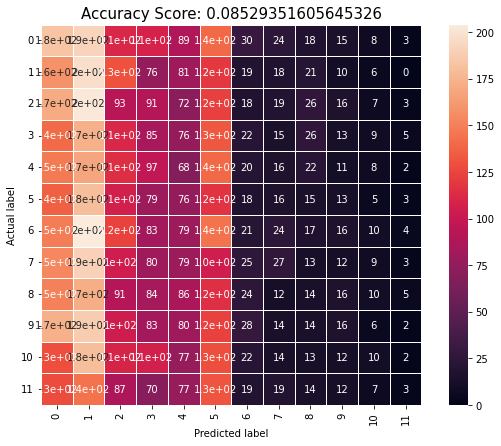

In [72]:
nb_cm = confusion_matrix(test_labels, nb_guesses)
nb_labels = nb_classifier.classes_
print(len(nb_labels))
plt.figure(figsize=(10,7))
sns.heatmap(data=nb_cm,linewidths=.5, annot=True,square = True)
plt.yticks(np.arange(len(nb_labels))+.5, nb_labels, rotation=0)
plt.xticks(np.arange(len(nb_labels))+.5, nb_labels, rotation=90)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
#all_sample_title = 'Accuracy Score: {0}'.format(nb_classifier.score(test_data, test_labels))
plt.title('Accuracy Score: ' + str(accuracy_score(test_labels, nb_guesses)), size = 15)

In [73]:
def Naive_Bayes_Classifier(label, train_data):
    #create a df that creates a list of labels to predict based on the data we want to train.
    sorted_df = df.sort_values(by=label)
    sorted_df = sorted_df.dropna(subset=[label, train_data])
    make_labels_uniques = list(sorted_df[label].unique())
    index_list = []
    essay_list = []
    
    #form a list of indexes to test on as train/test labels
    for label_i in range(len(make_labels_uniques)):
        indexes = [label_i] * len(sorted_df[sorted_df[label] == make_labels_uniques[label_i]])
        index_list.append(indexes)
    index_list = [item for sublist in index_list for item in sublist]
    
    #form a list of all the information from the data to be trained on
    for row in sorted_df[train_data]:
        essay_list.append(row)
        
    
    #split the train/test information
    train_labels, test_labels, train_data, test_data = train_test_split(index_list, essay_list,\
                                                                        test_size=0.2, random_state=1)
    #train the model on our voabularly by creating count vectors, and then count our two sets of train/test data
    counter = CountVectorizer()
    counter.fit(train_data)
    train_counts = counter.transform(train_data)
    test_counts = counter.transform(test_data)
    
    #train the classifier to classify the data based on the label we are trying to predict
    classifier = MultinomialNB()
    classifier.fit(train_counts, train_labels)
    
    #prediction accuracy
    predictions = classifier.predict(test_counts)
    prediction_accuracy = accuracy_score(test_labels, predictions)
    prediction_matrix = confusion_matrix(test_labels, predictions)
    
    return prediction_accuracy

In [74]:
#create a list of prediction labels to later learn which provides the highest accuracy score
def which_label_is_best(list_of_labels, train_data_list):
    prediction_scores_df = pd.DataFrame()
    for data_item in train_data_list:
        prediction_scores = []
        for label_in_list in list_of_labels: 
            prediction_scores.append(Naive_Bayes_Classifier(label_in_list, data_item))
        prediction_scores_df[data_item] = prediction_scores
    return prediction_scores_df

In [75]:
df.columns

Index(['index', 'age', 'body_type', 'diet', 'drinks', 'drugs', 'education',
       'essay0', 'essay1', 'essay2',
       ...
       'location_cleaned_texas', 'location_cleaned_united kingdom',
       'location_cleaned_utah', 'location_cleaned_vietnam',
       'location_cleaned_virginia', 'location_cleaned_washington',
       'location_cleaned_west virginia', 'location_cleaned_wisconsin',
       'sign_int', 'all_essays'],
      dtype='object', length=102)

In [76]:
labels_to_test = ['body_type', 'income', 'job',
       'offspring', 'pets', 'sex', 'status', 'log_age', 'edu_int', 'religion_int', 'smoker_int',
       'drinks_int', 'drugs_int', 'diet_clean_anything', 'diet_clean_halal',
       'diet_clean_kosher', 'diet_clean_other', 'diet_clean_vegan',
       'diet_clean_vegetarian', 'orientation_bisexual', 'orientation_gay',
       'orientation_straight', 'sign_int', 'ethnicity_clean_asian', 'ethnicity_clean_black',
       'ethnicity_clean_indian', 'ethnicity_clean_latin',
       'ethnicity_clean_middle eastern', 'ethnicity_clean_multiethnic',
       'ethnicity_clean_native american', 'ethnicity_clean_other',
       'ethnicity_clean_pacific islander', 'ethnicity_clean_unknown',
       'ethnicity_clean_white', 'location_cleaned_arizona',
       'location_cleaned_british columbia', 'location_cleaned_california',
       'location_cleaned_colorado', 'location_cleaned_connecticut',
       'location_cleaned_district of columbia', 'location_cleaned_florida',
       'location_cleaned_georgia', 'location_cleaned_germany',
       'location_cleaned_hawaii', 'location_cleaned_idaho',
       'location_cleaned_illinois', 'location_cleaned_louisiana',
       'location_cleaned_massachusetts', 'location_cleaned_mexico',
       'location_cleaned_michigan', 'location_cleaned_minnesota',
       'location_cleaned_mississippi', 'location_cleaned_missouri',
       'location_cleaned_montana', 'location_cleaned_netherlands',
       'location_cleaned_nevada', 'location_cleaned_new jersey',
       'location_cleaned_new york', 'location_cleaned_ohio',
       'location_cleaned_oregon', 'location_cleaned_pennsylvania',
       'location_cleaned_rhode island', 'location_cleaned_spain',
       'location_cleaned_switzerland', 'location_cleaned_tennessee',
       'location_cleaned_texas', 'location_cleaned_united kingdom',
       'location_cleaned_utah', 'location_cleaned_vietnam',
       'location_cleaned_washington', 'location_cleaned_west virginia' ]
data_to_train = ['all_essays']
full_score_df = which_label_is_best(labels_to_test, data_to_train)
full_score_df

all_essays
0     0.323768
1     0.790652
2     0.220578
3     0.324620
4     0.374129
..         ...
66    0.999898
67    1.000000
68    0.999898
69    0.999898
70    1.000000

[71 rows x 1 columns]

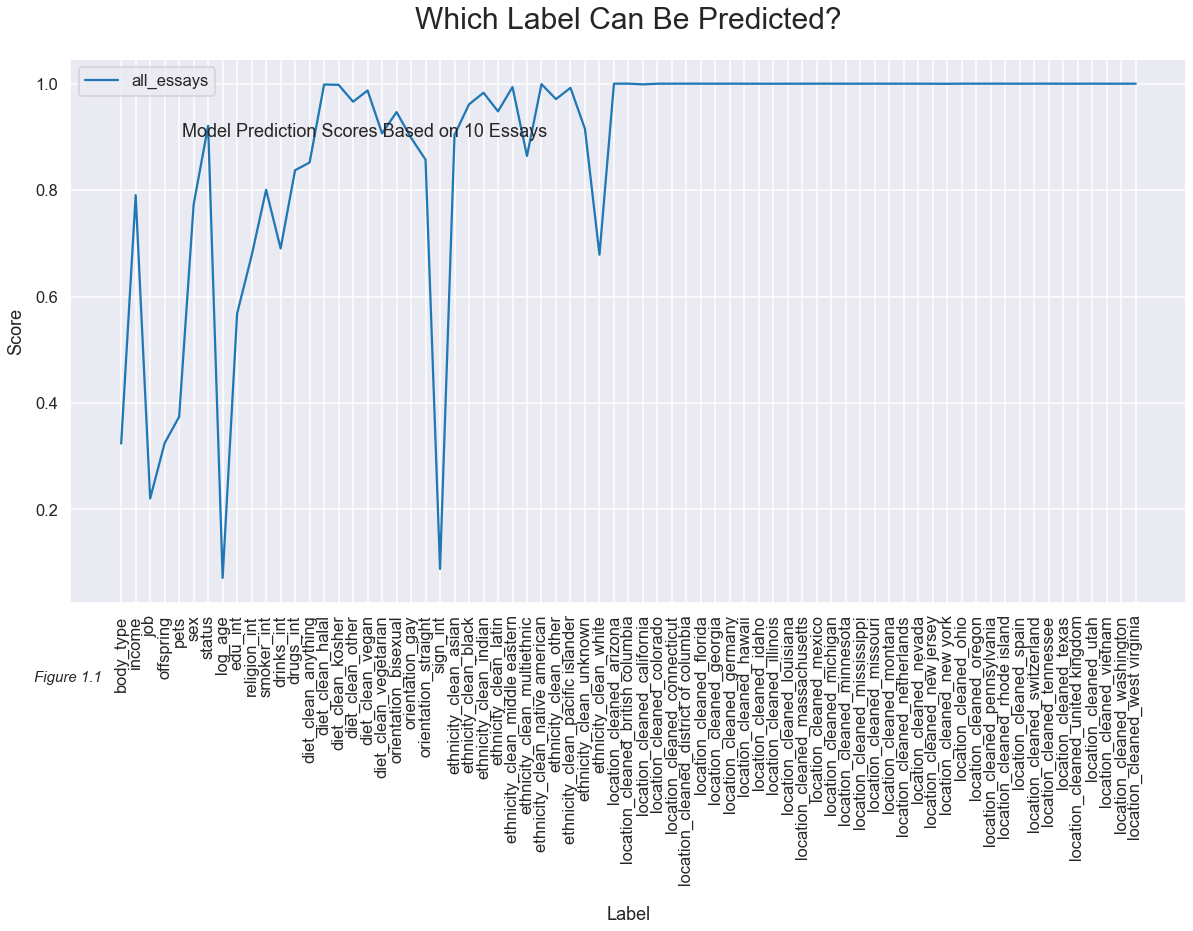

In [77]:
sns.set_context("talk")
sns.set_style("darkgrid")

fig, axes = plt.subplots(figsize=(20, 10))
for col in full_score_df.columns:
    plt.plot(range(len(labels_to_test)), full_score_df[col])
axes.set_xticks(range(len(labels_to_test)))
axes.set_xticklabels(labels_to_test, rotation=90)
plt.xlabel("Label", labelpad=20)
plt.ylabel("Score", labelpad=10)

plt.title("Which Label Can Be Predicted?", fontsize=30, pad=30)
plt.text(x=4.2, y=.9, s="Model Prediction Scores Based on 10 Essays")
plt.figtext(0.1, 0.015, "Figure 1.1", fontsize=15, fontstyle="italic")
plt.legend(full_score_df.columns)


plt.show()

In [78]:
def NBC_Score_Plot(label, train_data, fignum):
    #create a df that creates a list of labels to predict based on the data we want to train.
    sorted_df = df.sort_values(by=label)
    sorted_df = sorted_df.dropna(subset=[label, train_data])
    make_labels_uniques = list(sorted_df[label].unique())
    index_list = []
    essay_list = []
    
    #form a list of indexes to test on as train/test labels
    for label_i in range(len(make_labels_uniques)):
        indexes = [label_i] * len(sorted_df[sorted_df[label] == make_labels_uniques[label_i]])
        index_list.append(indexes)
    index_list = [item for sublist in index_list for item in sublist]
    
    #form a list of all the information from the data to be trained on
    for row in sorted_df[train_data]:
        essay_list.append(row)
        
    
    #split the train/test information
    train_labels, test_labels, train_data, test_data = train_test_split(index_list, essay_list,\
                                                                        test_size=0.2, random_state=1)
    #train the model on our voabularly by creating count vectors, and then count our two sets of train/test data
    counter = CountVectorizer()
    counter.fit(train_data)
    train_counts = counter.transform(train_data)
    test_counts = counter.transform(test_data)
    
    #train the classifier to classify the data based on the label we are trying to predict
    classifier = MultinomialNB()
    classifier.fit(train_counts, train_labels)
    
    #prediction accuracy score, recall score, precision score, f1 score, and confusion matrix

    predictions = classifier.predict(test_counts)
    prediction_accuracy = accuracy_score(test_labels, predictions)
    prediction_recall = recall_score(test_labels, predictions, average="weighted", zero_division=0)
    prediction_precision = precision_score(test_labels, predictions, average="weighted", zero_division=0)
    prediction_f1 = f1_score(test_labels, predictions, average="weighted", zero_division=0)
    prediction_matrix = confusion_matrix(test_labels, predictions)
    
    sns.set_context("talk")
    sns.set_style("ticks")
    fig, ax = plt.subplots(figsize=(15,10))

    ticks=np.linspace(0, (prediction_matrix.shape[0] - 1),num= prediction_matrix.shape[0])
    plt.imshow(prediction_matrix, interpolation='none', cmap= plt.cm.RdPu)
    plt.xticks(ticks, fontsize=15)
    plt.yticks(ticks, fontsize=15)
    ax.set_xticklabels(make_labels_uniques, rotation=30)
    ax.set_yticklabels(make_labels_uniques)    
    
    for i in range(prediction_matrix.shape[0]):
        for j in range(prediction_matrix.shape[1]):
            if prediction_matrix.shape[0] > 5:
                plt.text(x=i, y=j, s="{:,}".format(prediction_matrix[i,j]), ha="center", va="center", fontsize=10,\
                     color="white" if prediction_matrix[i, j] > (prediction_matrix.max()/2) else "black")
            elif prediction_matrix.shape[0] < 5:
                plt.text(x=i, y=j, s="{:,}".format(prediction_matrix[i,j]), ha="center", va="center", fontsize=40,\
                     color="white" if prediction_matrix[i, j] > (prediction_matrix.max()/2) else "black")
            else:
                plt.text(x=i, y=j, s="{:,}".format(prediction_matrix[i,j]), ha="center", va="center",\
                     color="white" if prediction_matrix[i, j] > (prediction_matrix.max()/2) else "black")
    
    
    plt.xlabel('Predicted', fontsize=20, labelpad=15)
    plt.ylabel('Actuals', fontsize=20, labelpad=25)
    plt.title('{} Confusion Matrix'.format(label.title()), fontsize=25)
    
    #plt.colorbar()
    plt.figtext(0.01, 0.015, "Figure 2.{}".format(fignum), fontsize=15, fontstyle="italic")
    plt.figtext(.8, .65, s="Accuracy: {:.4f}".format(prediction_accuracy))
    plt.figtext(.8, .55, s="Recall: {:.4f}".format(prediction_recall))
    plt.figtext(.8, .45, s="Precision: {:.4f}".format(prediction_precision))
    plt.figtext(.8, .35, s="F1 Score: {:.4f}".format(prediction_f1))

    fig.tight_layout()
    
    plt.show()
    plt.clf()

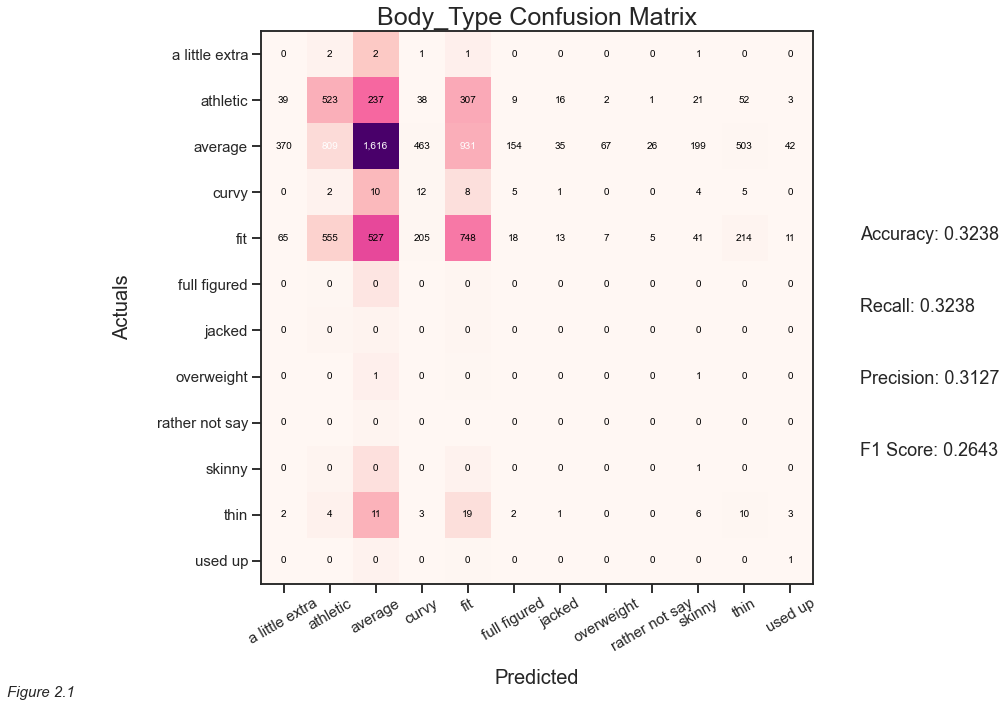

<Figure size 432x288 with 0 Axes>

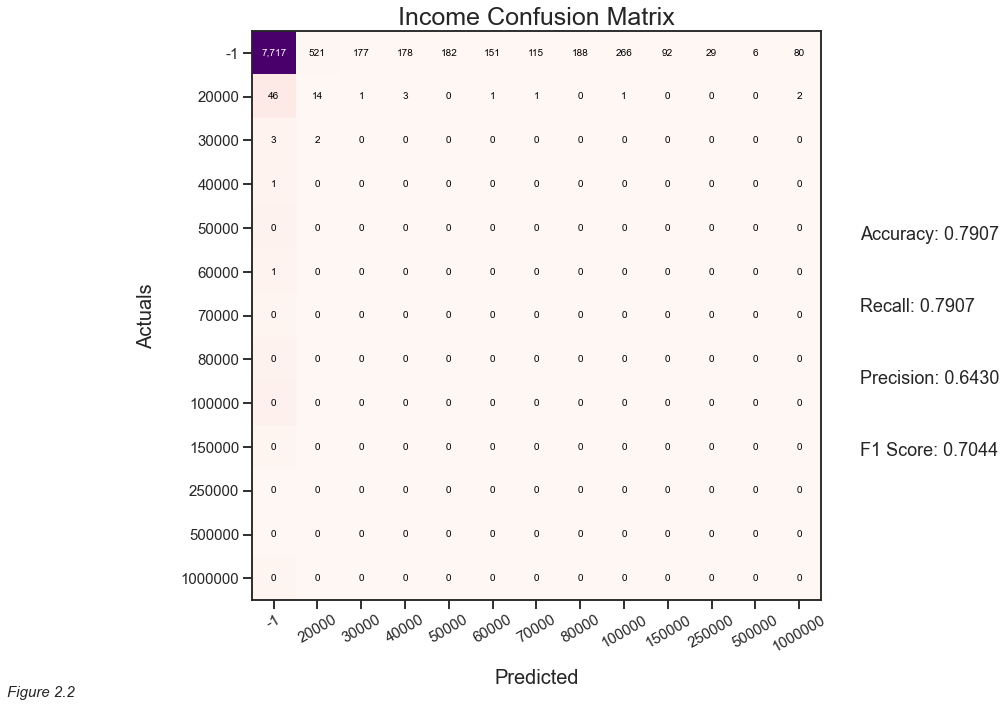

<Figure size 432x288 with 0 Axes>

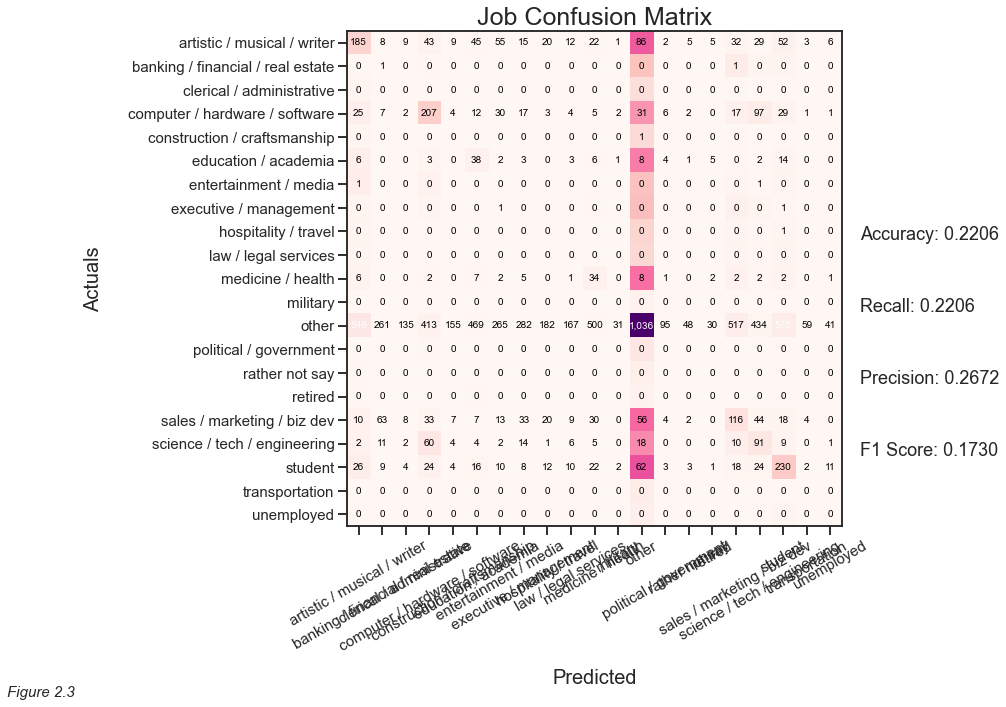

<Figure size 432x288 with 0 Axes>

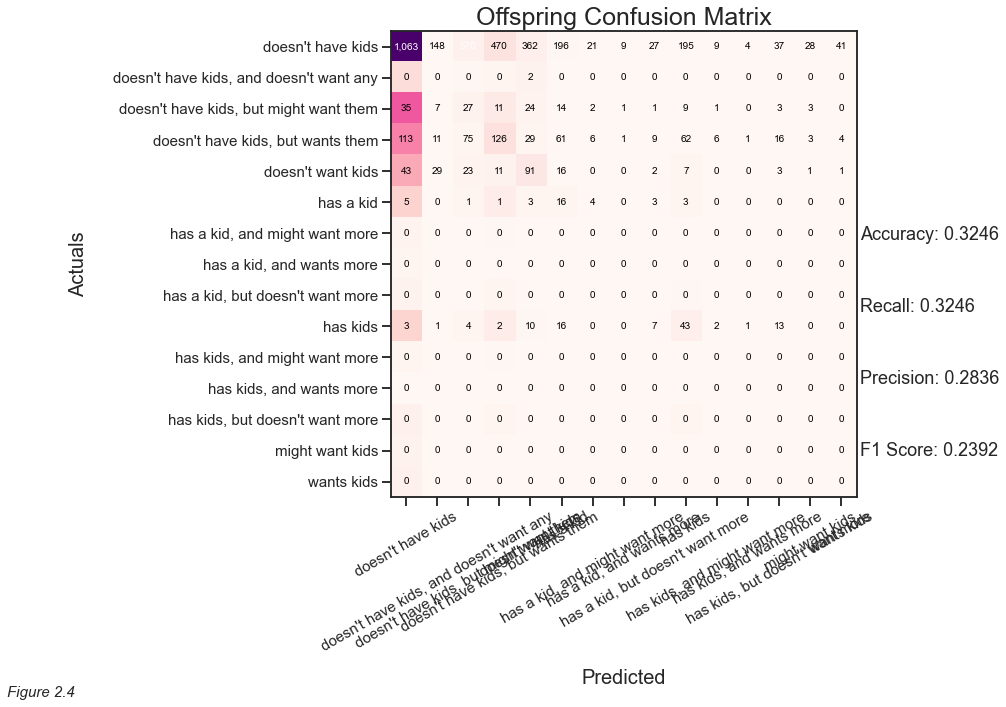

<Figure size 432x288 with 0 Axes>

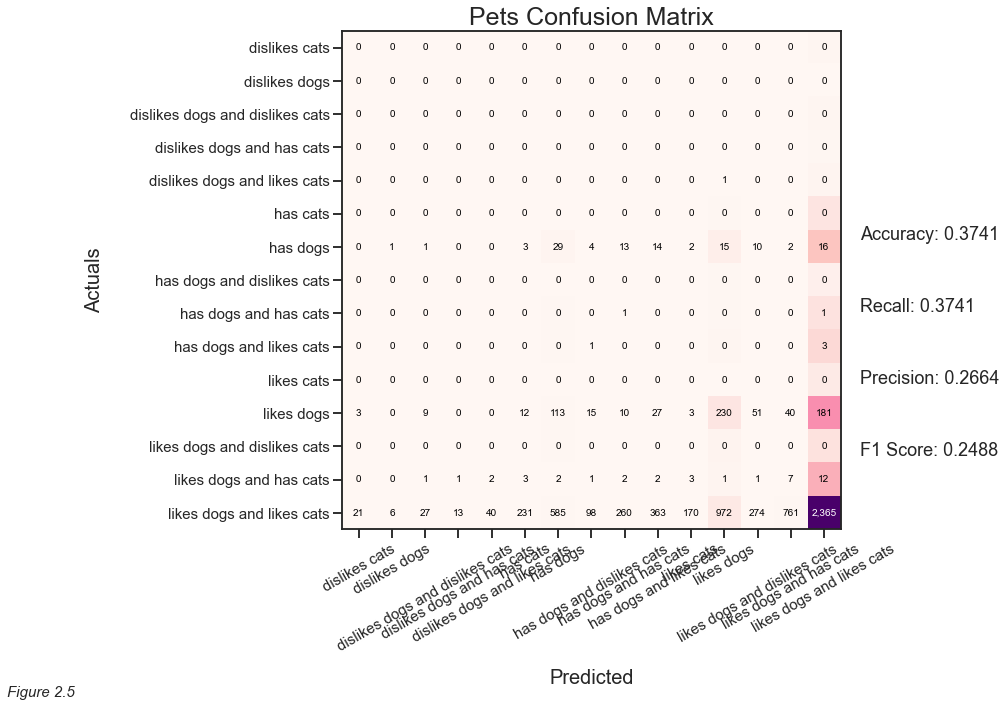

<Figure size 432x288 with 0 Axes>

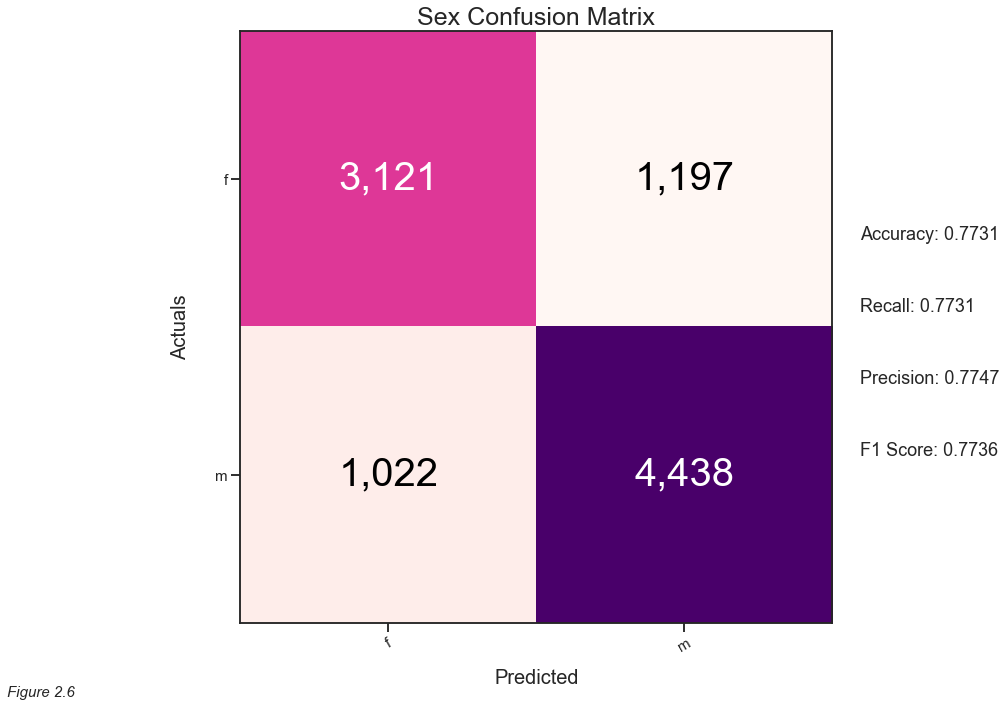

<Figure size 432x288 with 0 Axes>

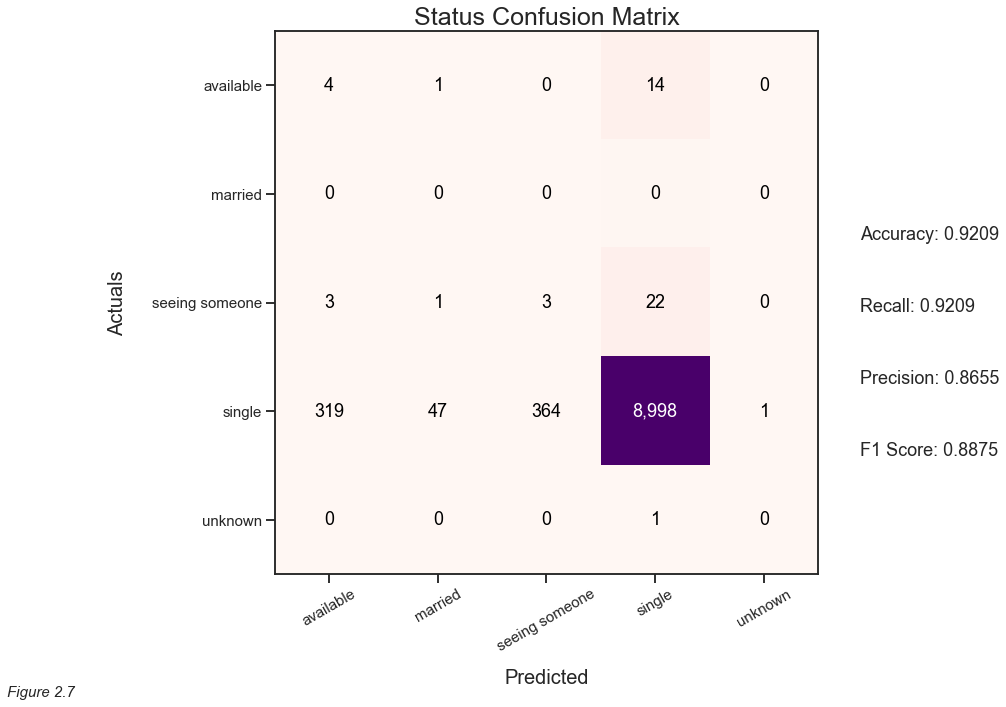

<Figure size 432x288 with 0 Axes>

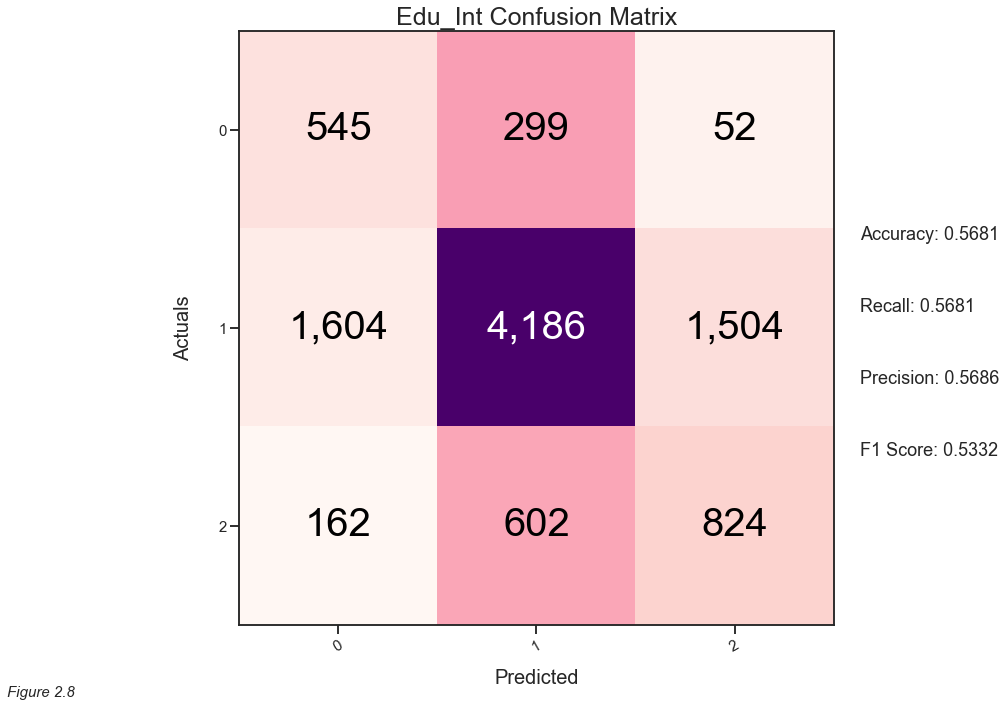

<Figure size 432x288 with 0 Axes>

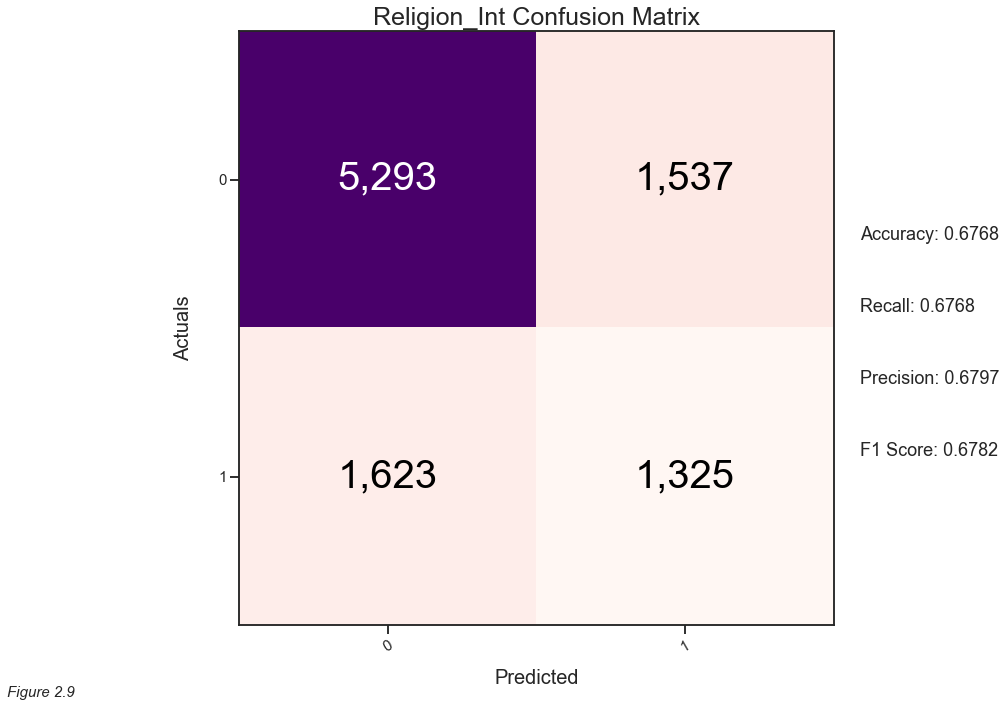

<Figure size 432x288 with 0 Axes>

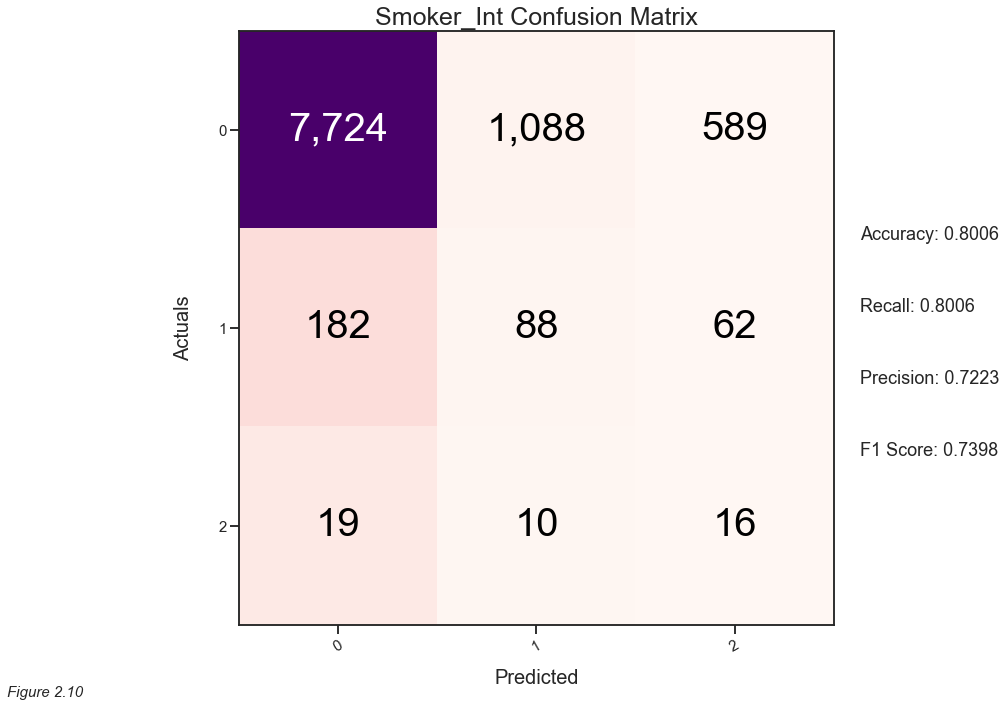

<Figure size 432x288 with 0 Axes>

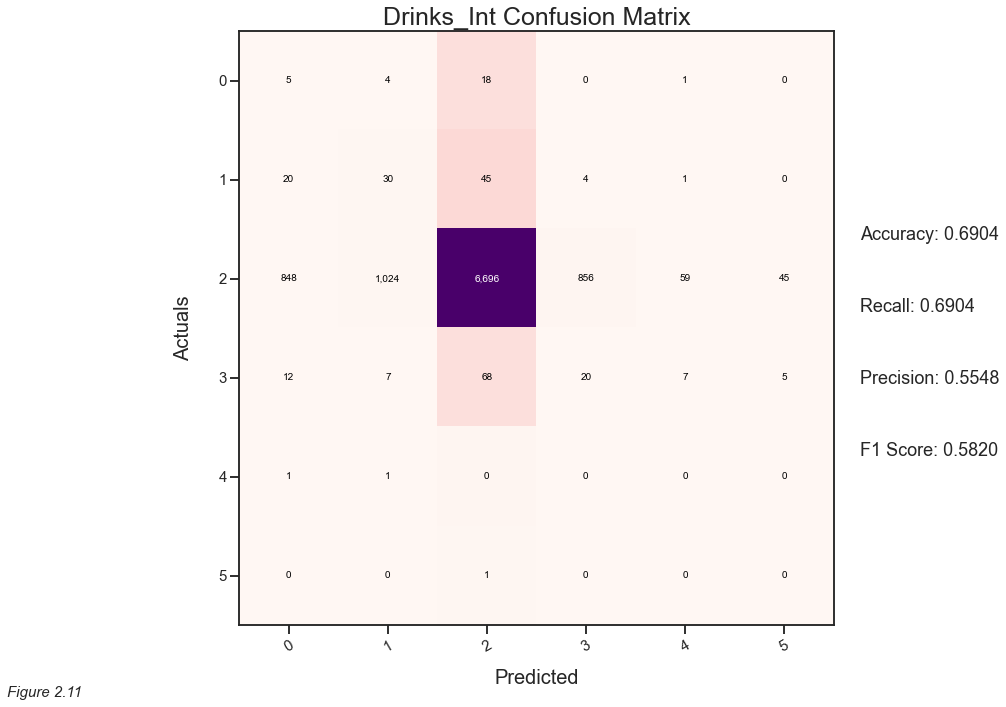

<Figure size 432x288 with 0 Axes>

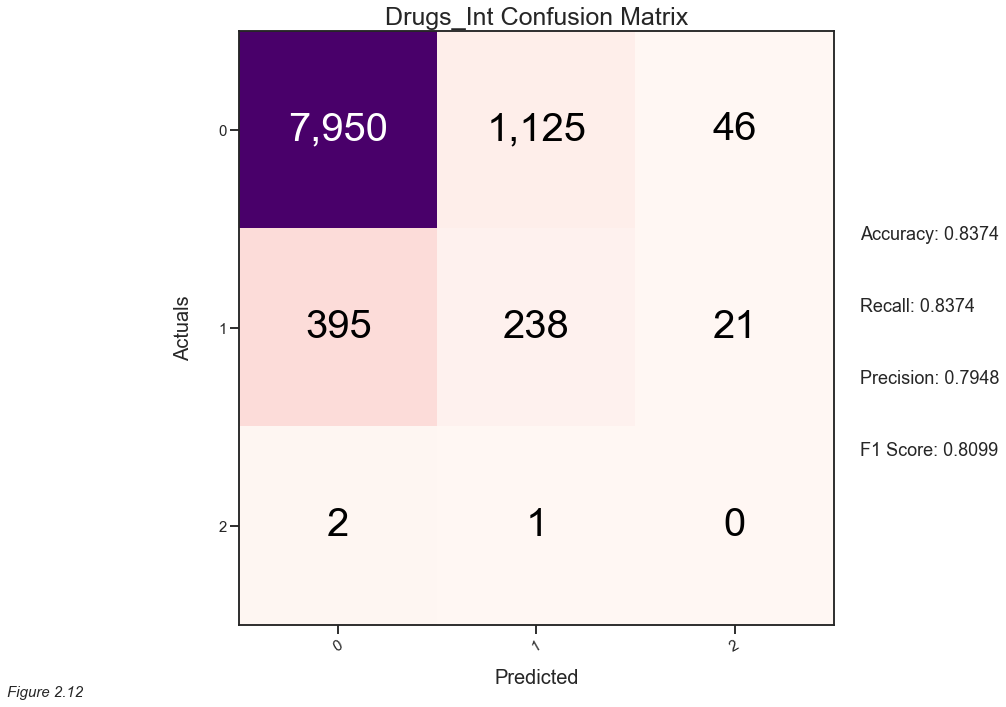

<Figure size 432x288 with 0 Axes>

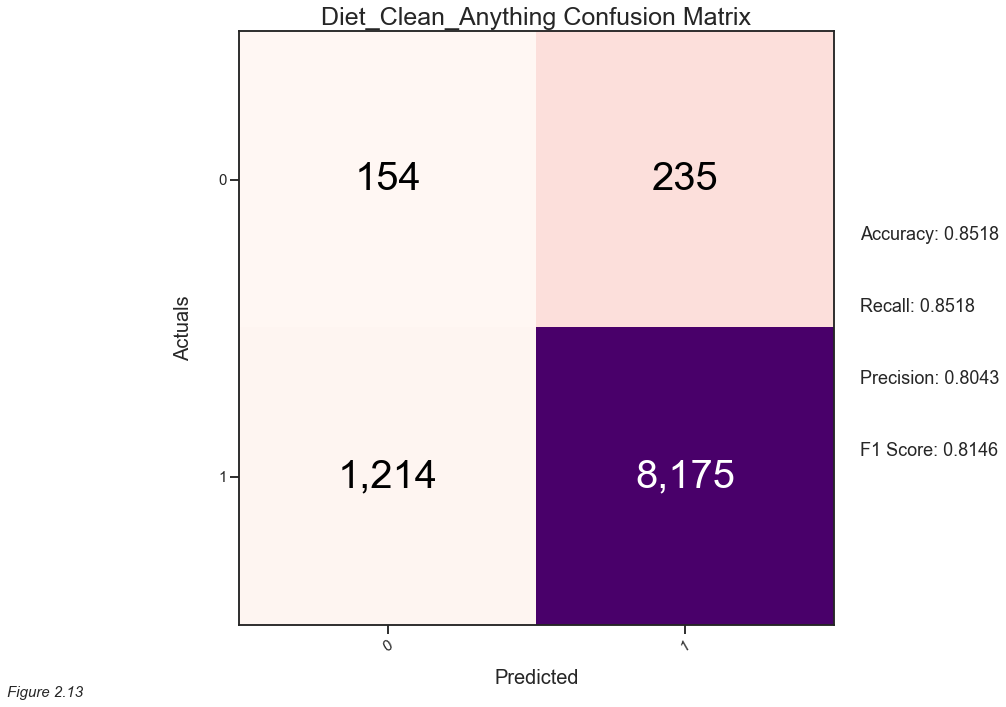

<Figure size 432x288 with 0 Axes>

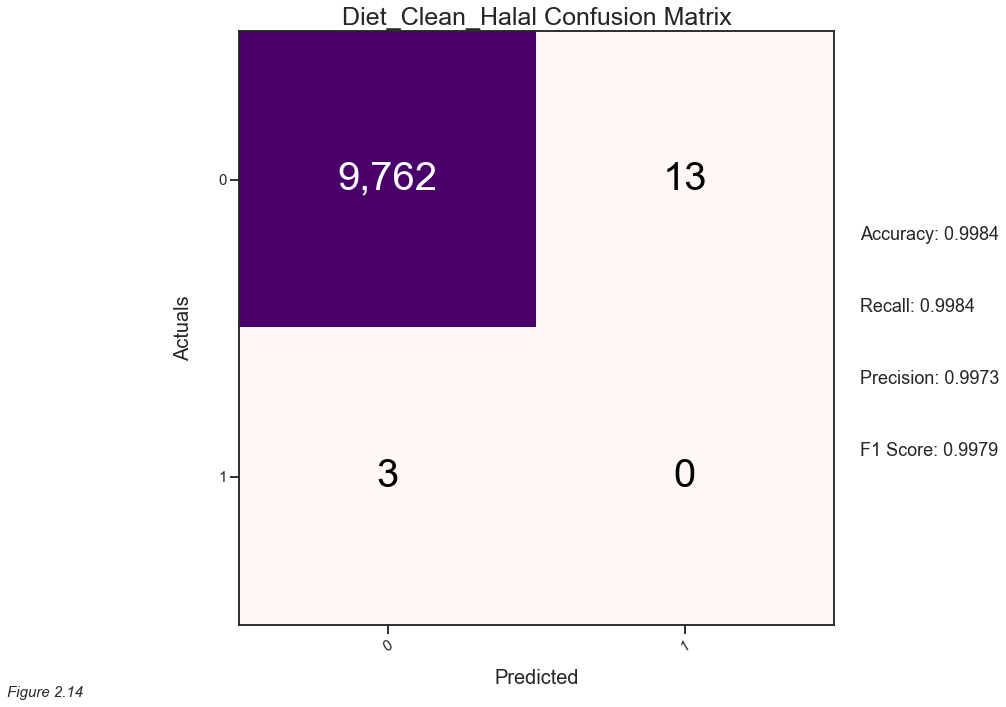

<Figure size 432x288 with 0 Axes>

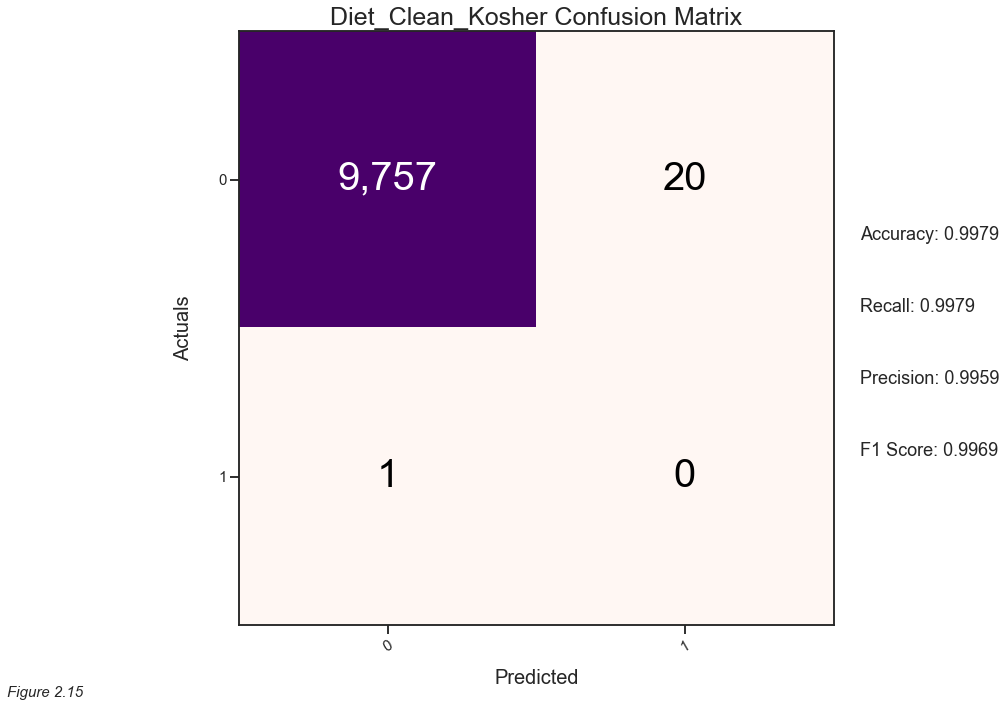

<Figure size 432x288 with 0 Axes>

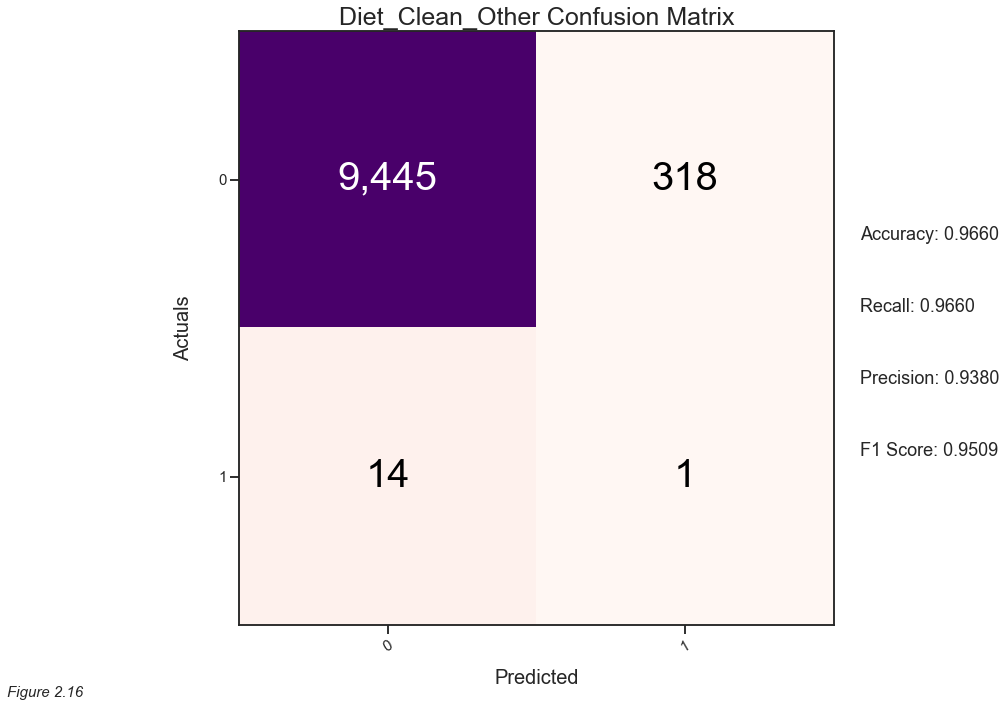

<Figure size 432x288 with 0 Axes>

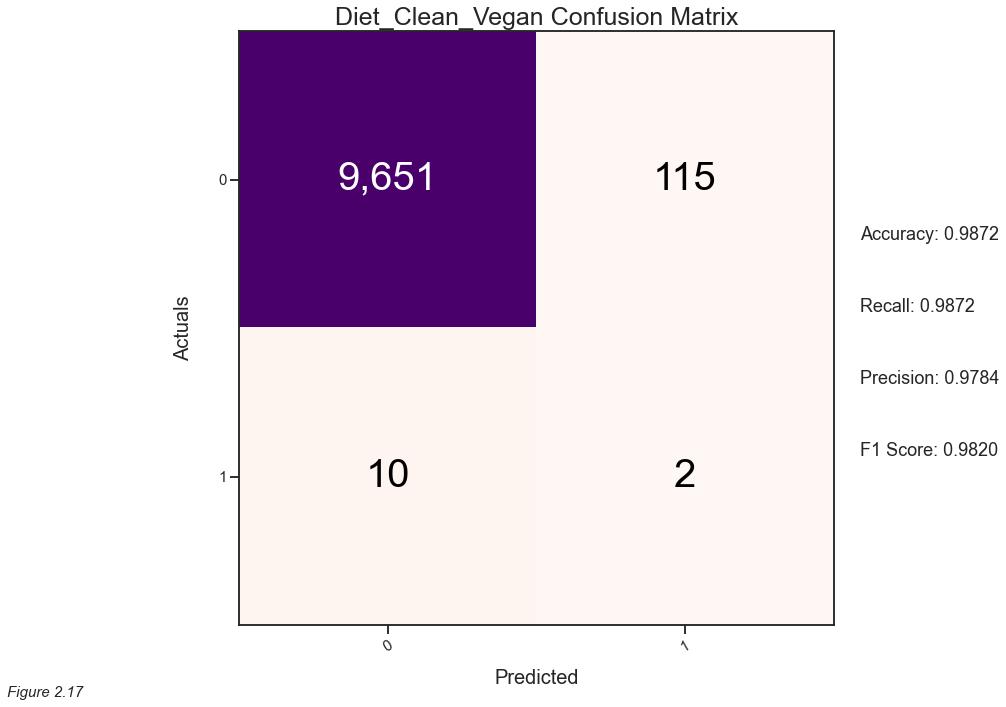

<Figure size 432x288 with 0 Axes>

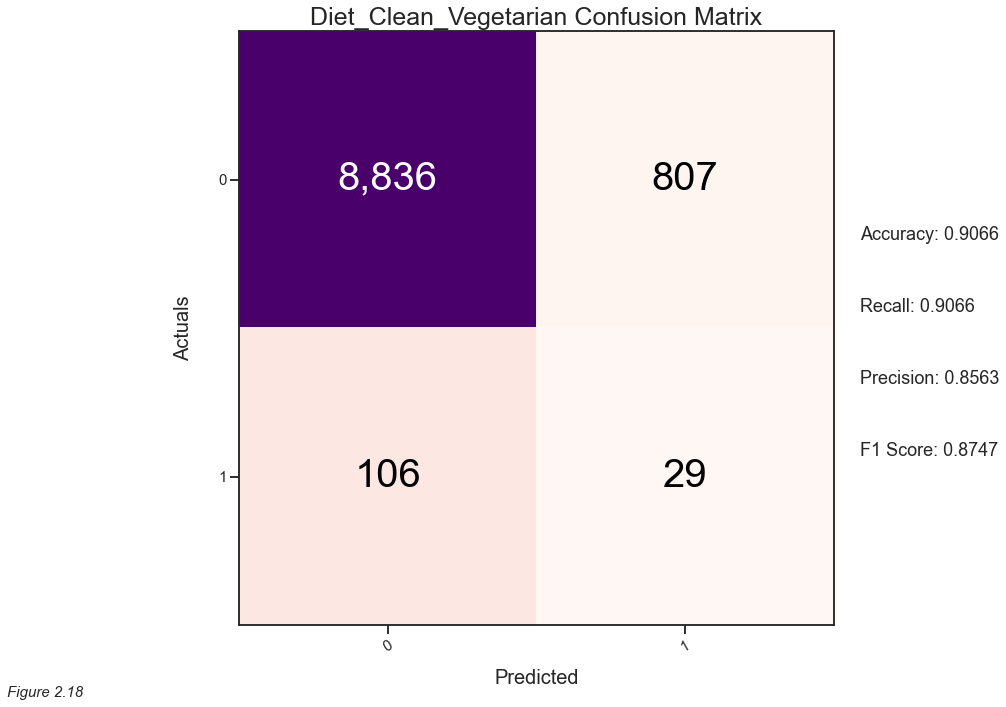

<Figure size 432x288 with 0 Axes>

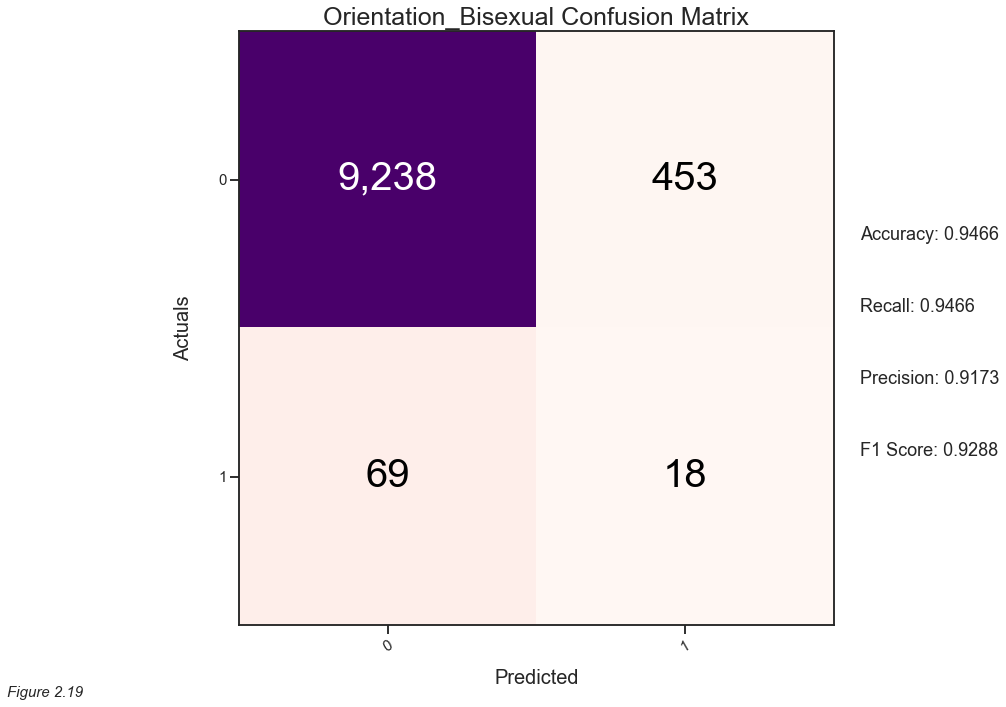

<Figure size 432x288 with 0 Axes>

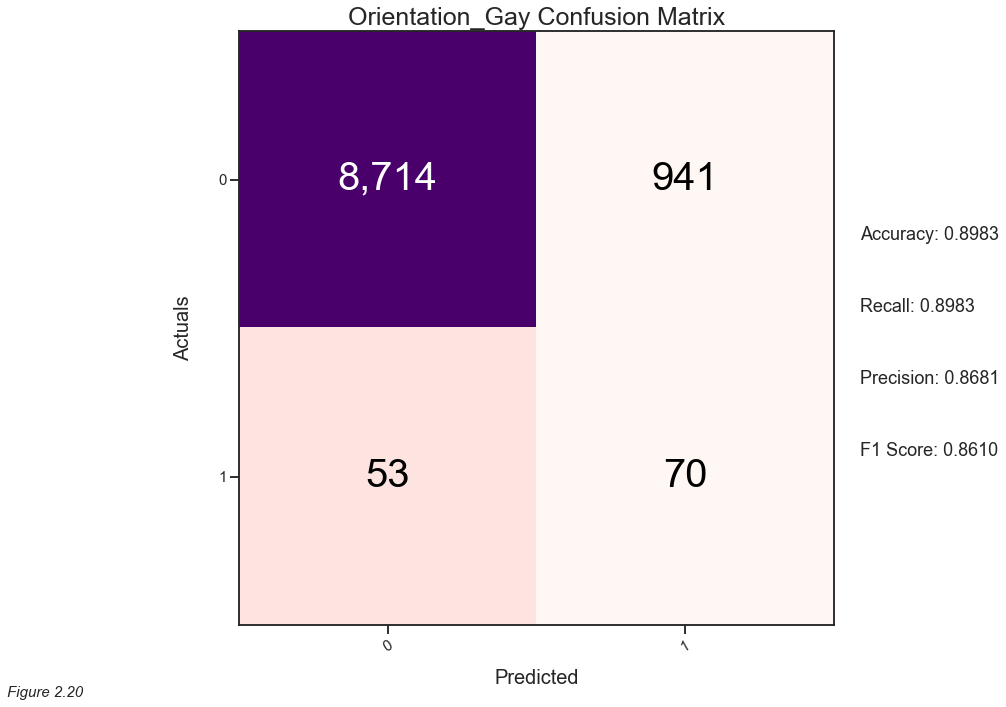

<Figure size 432x288 with 0 Axes>

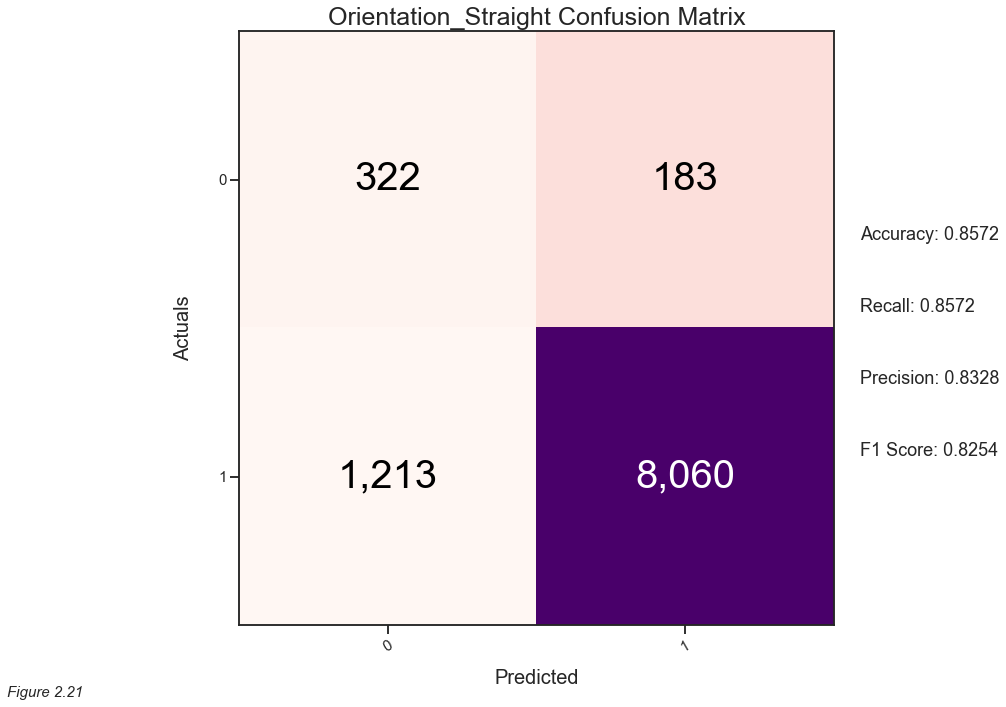

<Figure size 432x288 with 0 Axes>

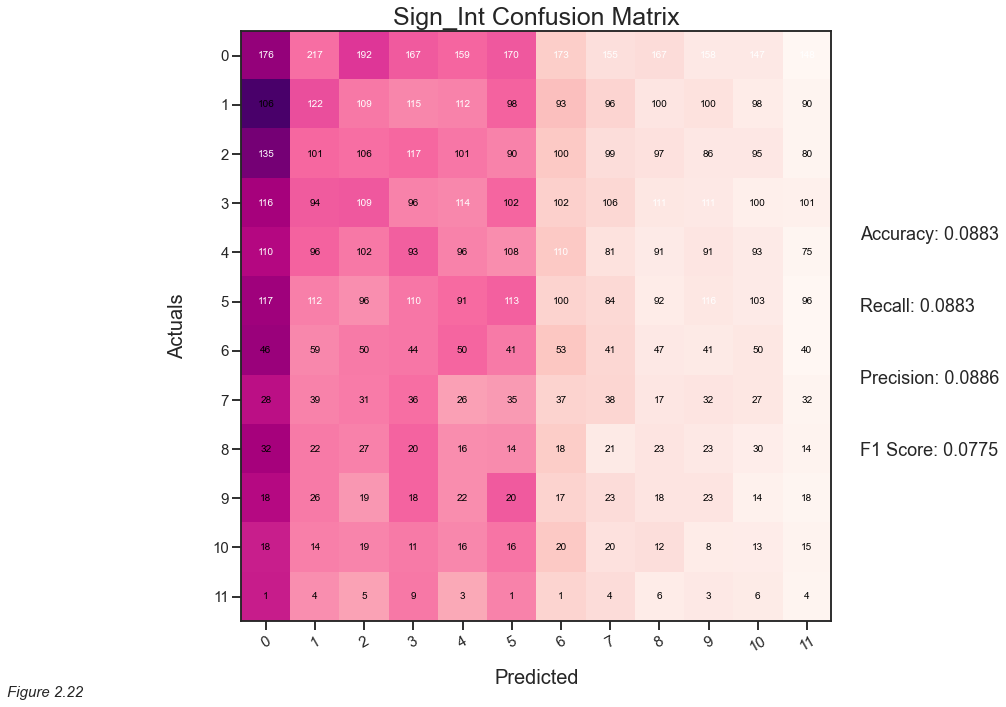

<Figure size 432x288 with 0 Axes>

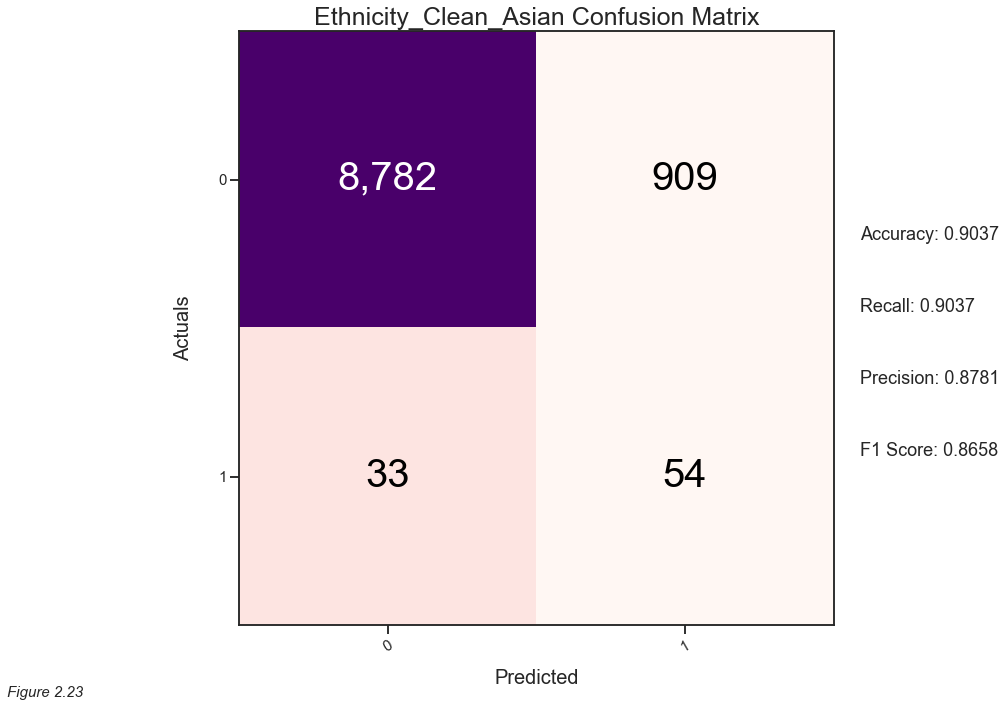

<Figure size 432x288 with 0 Axes>

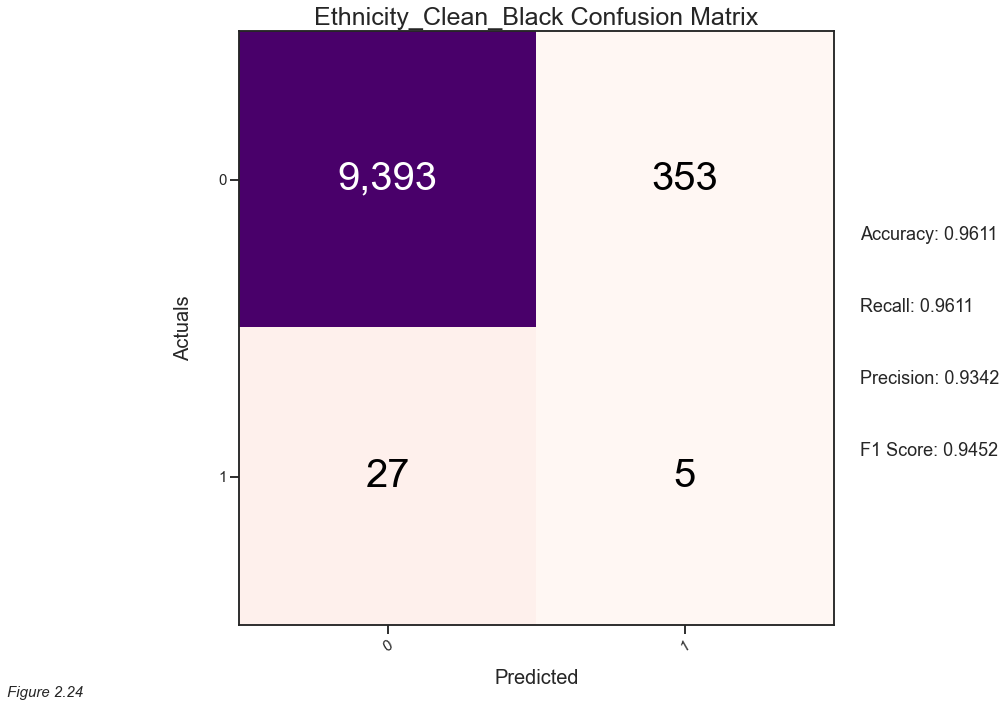

<Figure size 432x288 with 0 Axes>

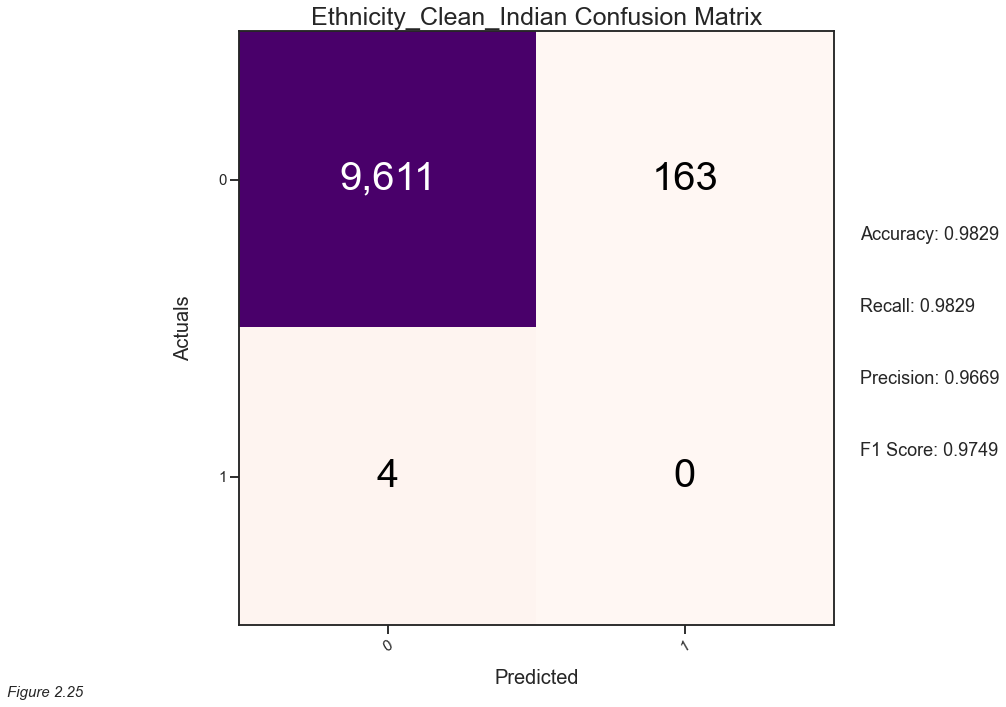

<Figure size 432x288 with 0 Axes>

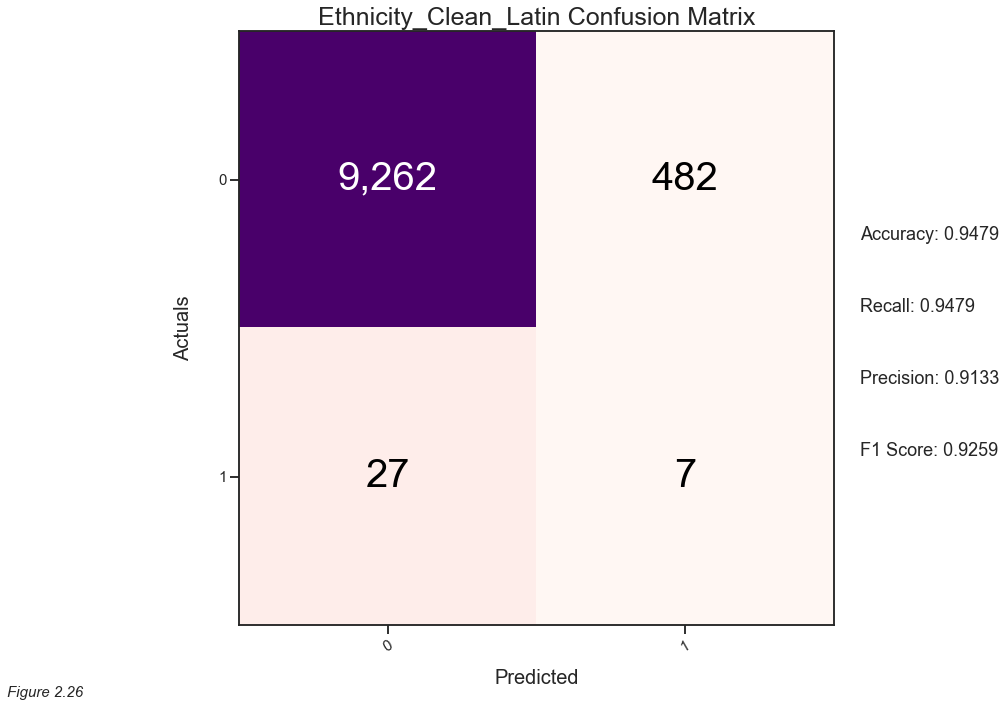

<Figure size 432x288 with 0 Axes>

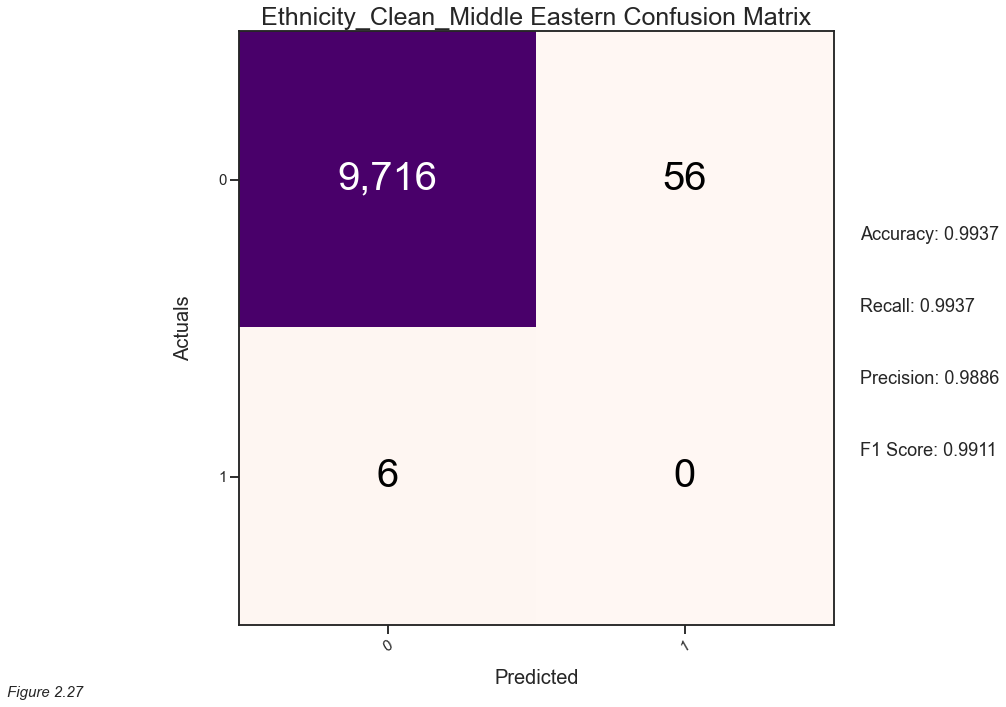

<Figure size 432x288 with 0 Axes>

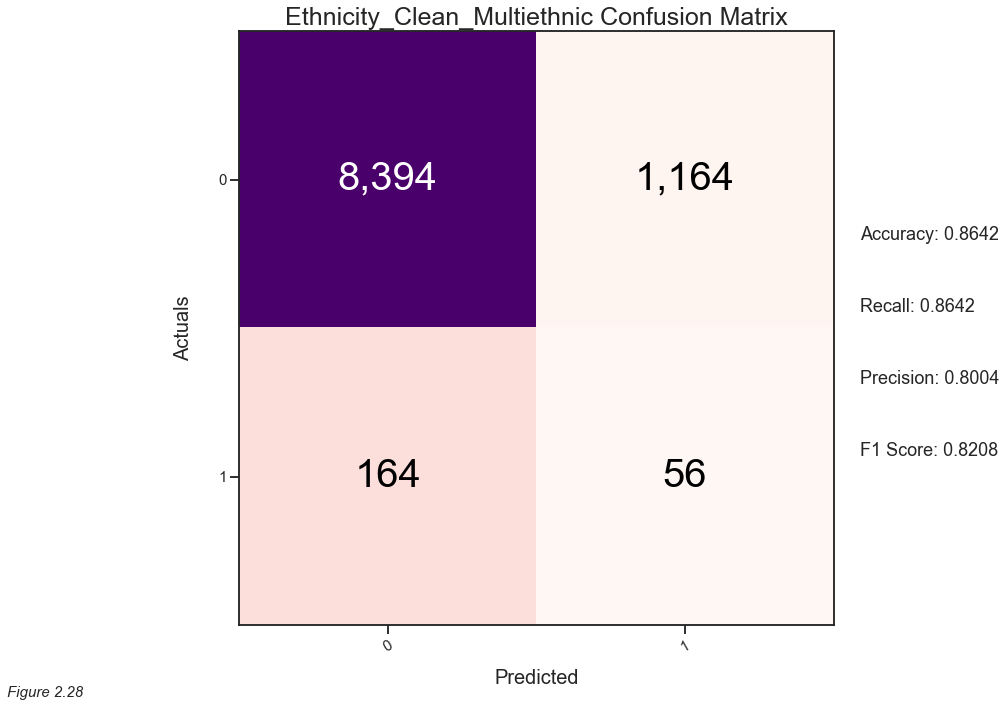

<Figure size 432x288 with 0 Axes>

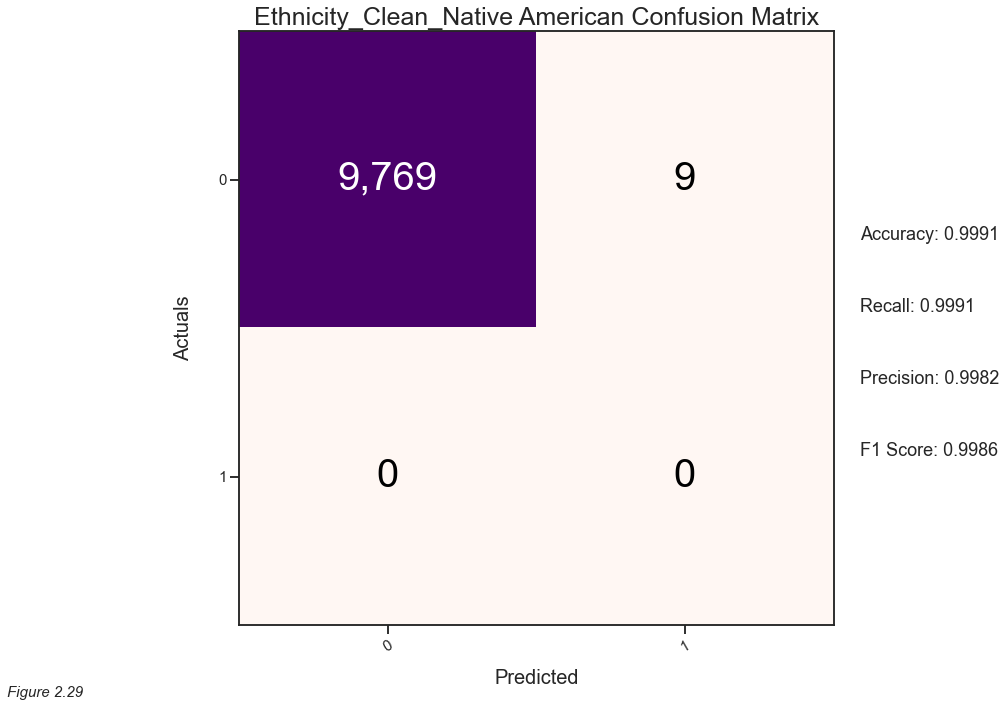

<Figure size 432x288 with 0 Axes>

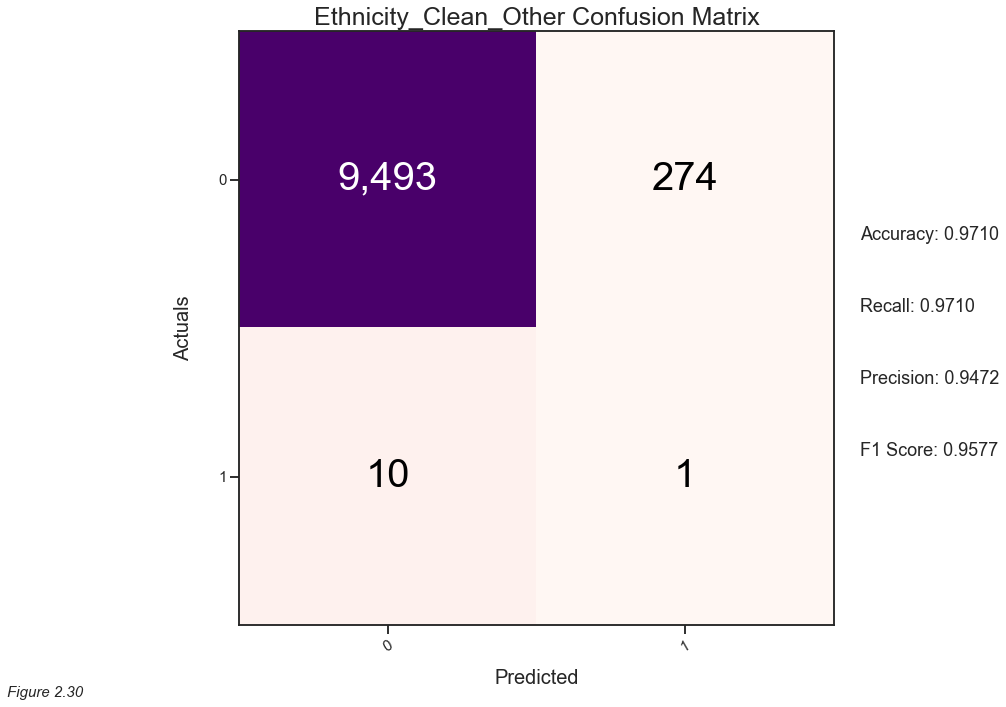

<Figure size 432x288 with 0 Axes>

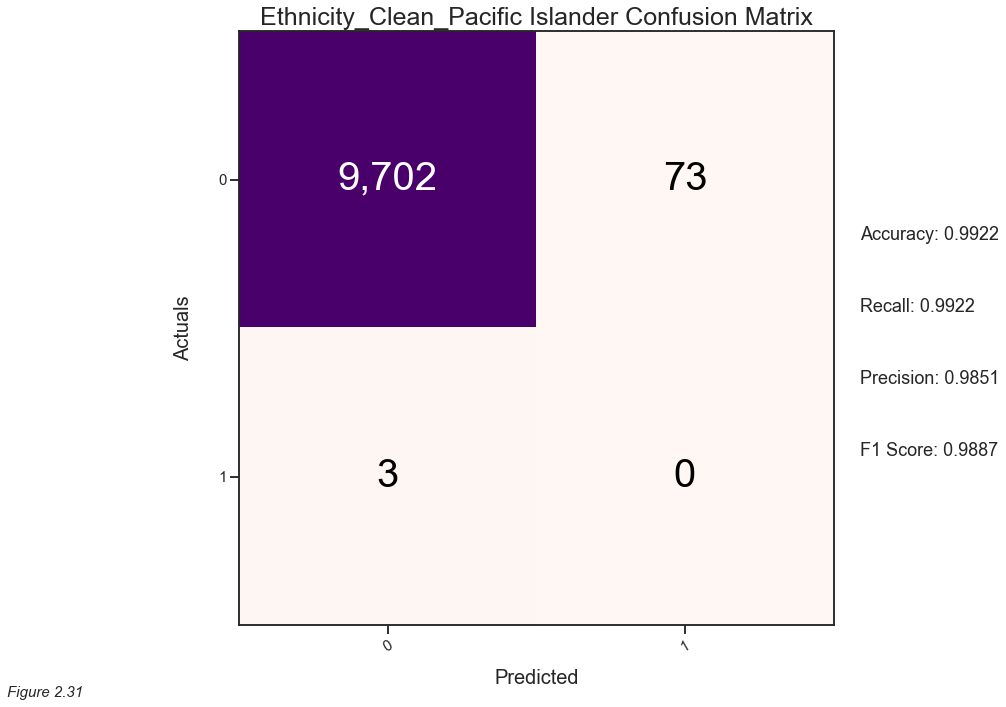

<Figure size 432x288 with 0 Axes>

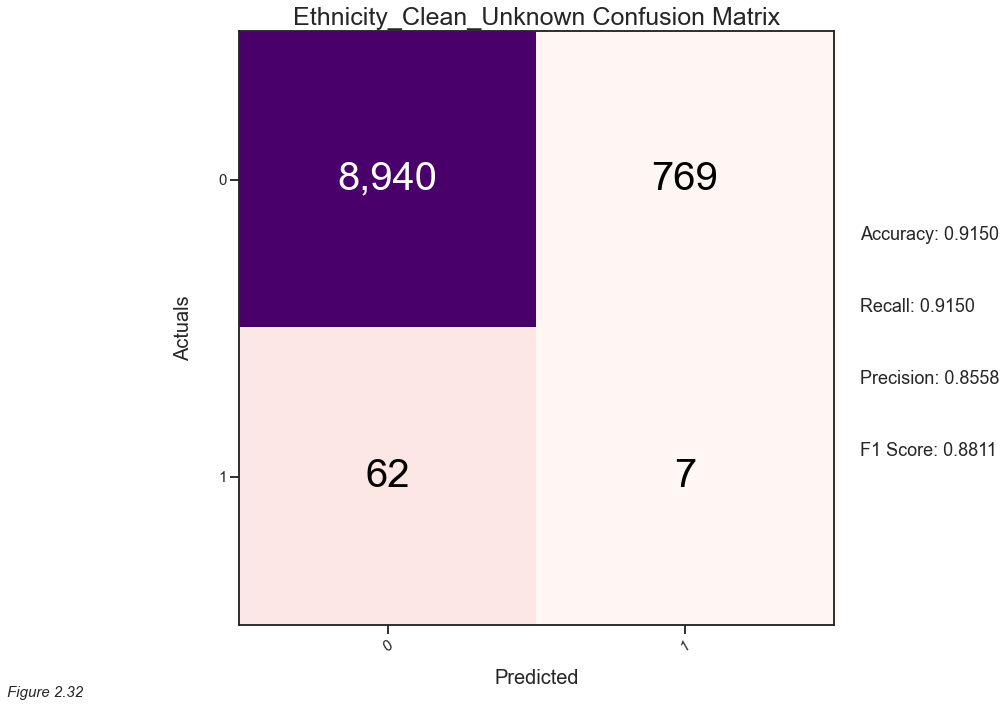

<Figure size 432x288 with 0 Axes>

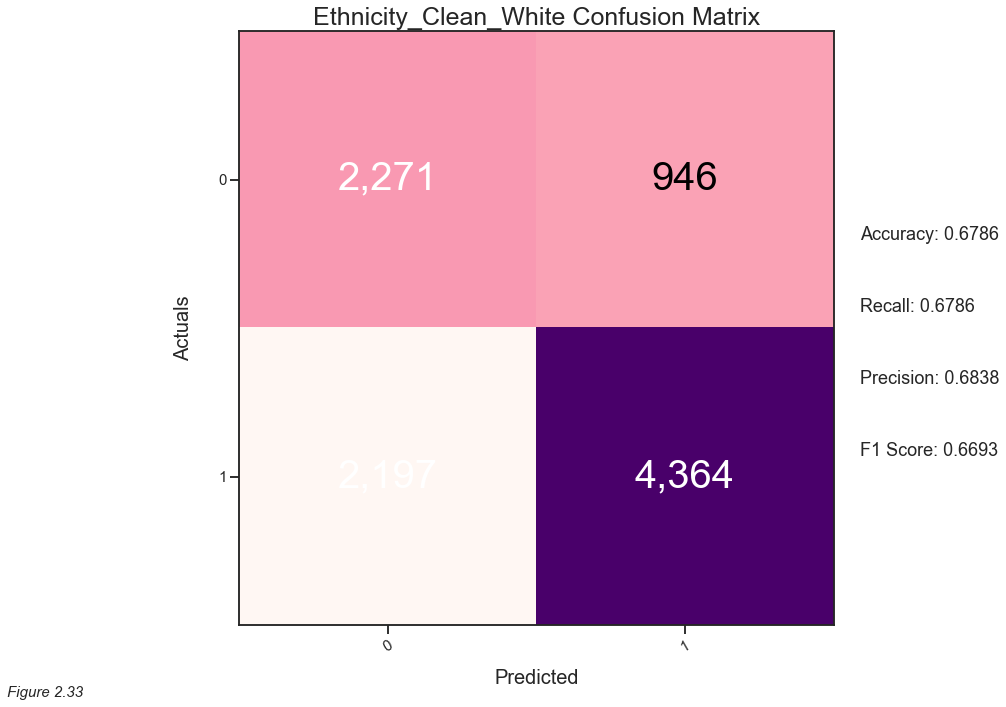

ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of ticklabels (2).

<Figure size 432x288 with 0 Axes>

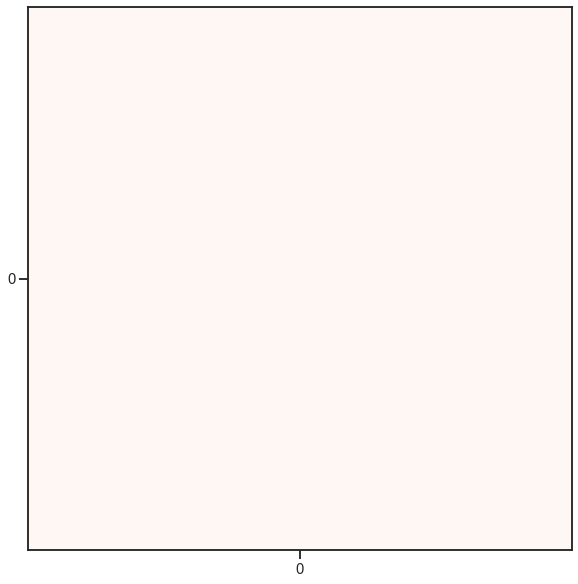

In [85]:
predictable_labels = ['body_type', 'income', 'job',
       'offspring', 'pets', 'sex', 'status', 'edu_int', 'religion_int', 'smoker_int',
       'drinks_int', 'drugs_int', 'diet_clean_anything', 'diet_clean_halal',
       'diet_clean_kosher', 'diet_clean_other', 'diet_clean_vegan',
       'diet_clean_vegetarian', 'orientation_bisexual', 'orientation_gay',
       'orientation_straight', 'sign_int', 'ethnicity_clean_asian', 'ethnicity_clean_black',
       'ethnicity_clean_indian', 'ethnicity_clean_latin',
       'ethnicity_clean_middle eastern', 'ethnicity_clean_multiethnic',
       'ethnicity_clean_native american', 'ethnicity_clean_other',
       'ethnicity_clean_pacific islander', 'ethnicity_clean_unknown',
       'ethnicity_clean_white', 'location_cleaned_arizona',
       'location_cleaned_british columbia', 'location_cleaned_california',
       'location_cleaned_colorado', 'location_cleaned_connecticut',
       'location_cleaned_district of columbia', 'location_cleaned_florida',
       'location_cleaned_georgia', 'location_cleaned_germany',
       'location_cleaned_hawaii', 'location_cleaned_idaho',
       'location_cleaned_illinois', 'location_cleaned_louisiana',
       'location_cleaned_massachusetts', 'location_cleaned_mexico',
       'location_cleaned_michigan', 'location_cleaned_minnesota',
       'location_cleaned_mississippi', 'location_cleaned_missouri',
       'location_cleaned_montana', 'location_cleaned_netherlands',
       'location_cleaned_nevada', 'location_cleaned_new jersey',
       'location_cleaned_new york', 'location_cleaned_ohio',
       'location_cleaned_oregon', 'location_cleaned_pennsylvania',
       'location_cleaned_rhode island', 'location_cleaned_spain',
       'location_cleaned_switzerland', 'location_cleaned_tennessee',
       'location_cleaned_texas', 'location_cleaned_united kingdom',
       'location_cleaned_utah', 'location_cleaned_vietnam',
       'location_cleaned_washington', 'location_cleaned_west virginia']
fignum=0
for pred_l in predictable_labels:
    fignum+=1
    NBC_Score_Plot(pred_l, "all_essays", fignum)